In [ ]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt
from pyranges import read_gtf


from umap import UMAP
#import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


In [ ]:
class2_dict = {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "N",
 'L4 IT': "N",
 'L5 ET': "N",
 'L5 IT': "N",
 'L5 PT': "N",
 'L4/5 IT': "N",
 'L5/6 NP': "N",
 'L6 CT': "N",
 'L6 IT': "N",
 'L6 IT Car3': "N",
 'L6b': "N",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}



In [3]:
class3_dict= {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "IT",
 'L4 IT': "IT",
 'L5 ET': "nIT",
 'L5 IT': "IT",
 'L5 PT': "nIT",
 'L4/5 IT': "IT",
 'L5/6 NP': "nIT",
 'L6 CT': "nIT",
 'L6 IT': "IT",
 'L6 IT Car3': "IT",
 'L6b': "nIT",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}



In [4]:
class4_dict = {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "IT",
 'L4 IT': "IT",
 'L5 ET': "IT",
 'L5 IT': "IT",
 'L5 PT': "IT",
 'L4/5 IT': "IT",
 'L5/6 NP': "IT",
 'L6 CT': "IT",
 'L6 IT': "IT",
 'L6 IT Car3': "IT",
 'L6b': "IT",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}



In [5]:
compress_name_dict = {'Chandelier': "Chr",
 'Lamp5': "Lp5",
 'Lamp5_Lhx6': "Lp5x6",
 'Pax6': "Pax6",
 'Pvalb': "Pvalb",
 'Sncg': "Sncg",
 'Sst': "Sst",
 'Sst Chodl': "SstChl",
 'Meis2': "Meis2",
 'Vip': "Vip",
 'L2/3 IT': "L2/3IT",
 'L4 IT': "L4IT",
 'L5 ET': "L5ET",
 'L5 IT': "L5IT",
 'L5 PT': "L5PT",
 'L4/5 IT': "L4/5IT",
 'L5/6 NP': "L5/6 NP",
 'L6 CT': "L6 CT",
 'L6 IT': "L6 IT",
 'L6 IT Car3': "L6ITCar3",
 'L6b': "L6b",
 'Astro': 'Astro',
 'Endo': 'Endo',
 'Micro-PVM': 'Micro',
 'OPC': 'OPC',
 'Oligo': "Oligo",
 'VLMC':'VLMC', 
 'Peri': 'Peri',
 'SMC': 'SMC',
 'T cell': 'TC',
 'basophil': 'baso',
 'erythroblast': 'eblast',
 'granulocyte': 'glcyte',
 'hematopoietic precursor cell': 'hpc',
 'immature B cell': 'iBC',
 'immature natural killer cell': 'iNKC',
 'late pro-B cell': 'lpBC',
 'macrophage': 'macro',
 'monocyte': 'mono',
 'naive B cell': 'nBC',
 'pro-B cell': 'pBC',
 'proerythroblast' : 'peblast',
 'Adipocytes' : 'Adipo',
 'Cardiomyocytes': 'Cmc',
 'Endocardial': 'Endo',
 'Endothelial_Arterial': 'EndoA' ,
 'Endothelial_Capillaries': 'EndoC',
 'Endothelial_Other': 'EndoO',
 'Endothelial_Venous': 'EndoV',
 'Fibroblasts': 'Fib',
 'Pericytes_Stromal': 'Peri_stro',
 'Smooth_Muscle_Cells': 'SMC',
 'Pericytes': 'Peri',
 'Epicardium_FB-like': 'EpiFB',
 'Epicardium_Meso': 'EpiMeso',
 'Epicardium_Proliferating': 'EpiPro',
 'Immature_Cardiomyocytes': 'iCmc',
 'Immature_other': 'iOther',
 'Lymphoid_Immune_Cells': 'Lymph',
 'Myeloid_Immune_Cells': 'Myel',
 'Neuronal_Cells': 'Neuro',}



In [6]:
values = [
    'Chandelier', 'Lamp5', 'Lamp5_Lhx6', 'Pax6', 'Pvalb', 'Sncg', 'Sst',
    'Sst Chodl', 'Meis2', 'Vip', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5 PT',
    'L4/5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b'
]

# Generate shades of purple
num_colors = len(values)+10
purples = sns.color_palette("Purples", num_colors)

# Create a dictionary mapping each value to a color
color_map_n = {value: color for value, color in zip(values, purples[10:])}

values = [
    'Astro', 'Endo', 'Micro-PVM', 'OPC', 'Oligo', 'VLMC', 'Peri', 'SMC'
]

# Generate shades of purple
num_colors = len(values)+3
purples = sns.color_palette("Greens", num_colors)

# Create a dictionary mapping each value to a color
color_map_nn = {value: color for value, color in zip(values, purples[3:])}



values = [
    'T cell', 'basophil', 'erythroblast', 'granulocyte', 'hematopoietic precursor cell', 'immature B cell', 'immature natural killer cell', 'late pro-B cell', 'macrophage', 'monocyte', 'naive B cell', 'pro-B cell', 'proerythroblast',
]

# Generate shades of purple
num_colors = len(values)+5
purples = sns.color_palette("Reds", num_colors)

# Create a dictionary mapping each value to a color
color_map_bl = {value: color for value, color in zip(values, purples[5:])}



values = [
    'Adipocytes', 'Cardiomyocytes', 'Endocardial', 'Endothelial_Arterial', 'Endothelial_Capillaries', 'Endothelial_Other', 'Endothelial_Venous', 'Fibroblasts', 'Pericytes_Stromal', 'Smooth_Muscle_Cells', 'Pericytes', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Immature_Cardiomyocytes', 'Immature_other', 'Lymphoid_Immune_Cells', 'Myeloid_Immune_Cells', 'Neuronal_Cells']

# Generate shades of purple
num_colors = len(values)+10
purples = sns.color_palette("Reds", num_colors)

# Create a dictionary mapping each value to a color
color_map_ht = {value: color for value, color in zip(values, purples[10:])}



In [7]:
values = [
    'Chandelier', 'Lamp5', 'Lamp5_Lhx6', 'Pax6', 'Pvalb', 'Sncg', 'Sst',
    'Sst Chodl', 'Meis2', 'Vip', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5 PT',
    'L4/5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b'
]

# Generate shades of purple
num_colors = len(values)
purples = sns.color_palette("Purples", num_colors)

# Create a dictionary mapping each value to a color
color_map_n = {value: color for value, color in zip(values, purples)}

values = [
    'Astro', 'Endo', 'Micro-PVM', 'OPC', 'Oligo', 'VLMC', 'Peri', 'SMC'
]

# Generate shades of purple
num_colors = len(values)
purples = sns.color_palette("Greens", num_colors)

# Create a dictionary mapping each value to a color
color_map_nn = {value: color for value, color in zip(values, purples)}



values = [
    'T cell', 'basophil', 'erythroblast', 'granulocyte', 'hematopoietic precursor cell', 'immature B cell', 'immature natural killer cell', 'late pro-B cell', 'macrophage', 'monocyte', 'naive B cell', 'pro-B cell', 'proerythroblast',
]

# Generate shades of purple
num_colors = len(values)
purples = sns.color_palette("Reds", num_colors)

# Create a dictionary mapping each value to a color
color_map_bl = {value: color for value, color in zip(values, purples)}



values = [
    'Adipocytes', 'Cardiomyocytes', 'Endocardial', 'Endothelial_Arterial', 'Endothelial_Capillaries', 'Endothelial_Other', 'Endothelial_Venous', 'Fibroblasts', 'Pericytes_Stromal', 'Smooth_Muscle_Cells', 'Pericytes', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Immature_Cardiomyocytes', 'Immature_other', 'Lymphoid_Immune_Cells', 'Myeloid_Immune_Cells', 'Neuronal_Cells']

# Generate shades of purple
num_colors = len(values)
purples = sns.color_palette("Reds", num_colors)

# Create a dictionary mapping each value to a color
color_map_ht = {value: color for value, color in zip(values, purples)}



In [8]:
values = ['L2/3 IT', 'L4 IT',  'L5 IT', 
    'L4/5 IT',  'L6 IT', 'L6 IT Car3', 
]

# Generate shades of purple
num_colors = len(values)
purples = sns.color_palette("Blues", num_colors)

# Create a dictionary mapping each value to a color
color_map_IT = {value: color for value, color in zip(values, purples)}


In [9]:
values = ['L5 ET',  'L5 PT', 'L5/6 NP', 'L6 CT', 'L6b'
]

# Generate shades of purple
num_colors = len(values)
purples = sns.color_palette("Reds", num_colors)

# Create a dictionary mapping each value to a color
color_map_nIT = {value: color for value, color in zip(values, purples)}


In [10]:
subclass_color_dict.update(color_map_n)
subclass_color_dict.update(color_map_nn)
subclass_color_dict.update(color_map_bl)
subclass_color_dict.update(color_map_ht)

NameError: name 'subclass_color_dict' is not defined

In [10]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

In [41]:
df_list_egad = []
no_of_markers_list = [200]     
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['inter']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['Glutamatergic']

            for shuf in [False]:
                for drop_duplicates in [True]:
                    for marker_name in marker_name_list:
                        if process_type == 'intra':
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw', '1kbp_raw']
                        else:
                            resolution_list = ['10kbp_raw']
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'



In [42]:
outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'


In [382]:
#outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_true_no_of_markers.h5ad'


In [383]:
#pd.read_csv(outputfile_h5ad).sum(axis=0)

In [49]:
process_type='inter'
input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/250kbp_raw/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'



In [50]:
adata_inter = ad.read_h5ad(f'{input_file_h5ad}', backed='r')






In [55]:
adata_inter

AnnData object with n_obs × n_vars = 20134 × 11512 backed at '/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_human/aggregates/250kbp_raw/max/hic_gene_inter_KR_inter_0_z_scores_by_allbins_max.h5ad'
    layers: 'inter_0_raw', 'inter_0_z_scores'

In [51]:
process_type='intra'
input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/250kbp_raw/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'



In [52]:
adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')



In [54]:
adata_intra

AnnData object with n_obs × n_vars = 20134 × 11512 backed at '/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_human/aggregates/250kbp_raw/max/hic_gene_intra_KR_intra_0_z_scores_by_allbins_max.h5ad'
    layers: 'intra_0_raw', 'intra_0_z_scores'

In [44]:
df = adata.to_df(layer='mean')

In [386]:
#adata = ad.read_h5ad(f'{input_file_h5ad}', backed='r')

In [23]:
df_dict = pd.DataFrame(list(class2_dict.items()), columns=['name', 'subclass'])

In [24]:
df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['N'])]['name'].tolist())]

In [55]:
df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['N'])]['name'].tolist())]

In [ ]:
df = df.loc[:, (df.sum(axis=0) != 0)]

In [387]:
df_dict = pd.DataFrame(list(class3_dict.items()), columns=['name', 'subclass'])

df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['N'])]['name'].tolist())]

In [375]:
#df_layer = df_layer.dropna()

In [376]:
#df_layer = df_layer.fillna(0)

In [45]:
df_layer = df.dropna(axis=1, how='all')
scaler = StandardScaler()
scaler.fit(df_layer)

df_layer_scaled = scaler.transform(df_layer)

#df_layer_scaled = df_layer_scaled.fillna(0)
df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

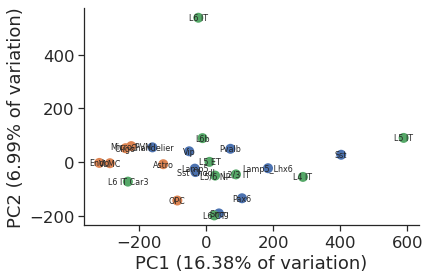

In [46]:


    
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer_scaled)
    #proj_2d = pca.fit_transform(R1)
    #umap_2d = UMAP(n_components=2, init='random', random_state=10)
    #proj_2d = umap_2d.fit_transform(features_sc)

    df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

    # Access explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
    df_proj_2d['cell_type'] = df_layer.index.tolist()
    #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
    #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



    ax = sns.scatterplot(
        x=df_proj_2d['PC1'],
        y=df_proj_2d['PC2'],
        hue=df_proj_2d['subclass'],
        s=100,
        linewidth=0, 
        legend=False # Remove legend box
    )
    # Initialize list to store labeled point positions
    labeled_points = []

    # Add text labels with adjusted positions to reduce overlap
    for i, row in df_proj_2d.iterrows():
        # Define offset values based on the scale of the plot and density of points
        x_offset = 0
        y_offset = 0
        # Check if label overlaps with any existing label
        #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        #    x_offset += 10
        #    y_offset += 10
        # Add label to the plot with adjusted positions
        plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
        # Record labeled point to avoid overlapping
        labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')


    # Show the plot
    #plt.show()
    plt.show()
    #plt.plot()

In [40]:
k

NameError: name 'k' is not defined

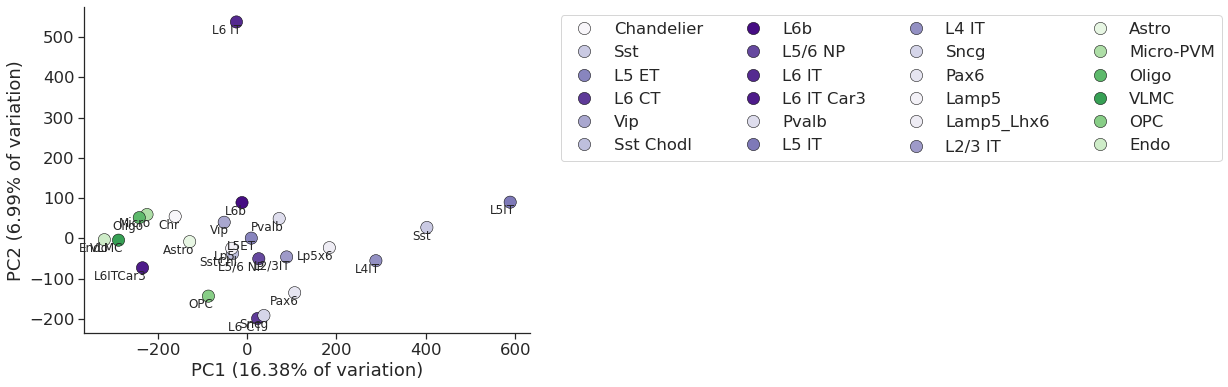

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming proj_2d is your PCA projection data and pca is your PCA object
df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

# Access explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Adding subclass and cell_type columns
df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
df_proj_2d['cell_type'] = df_layer.index.tolist()
df_proj_2d = df_proj_2d.sort_values(by=['subclass'])
df_proj_2d['cell_n'] = [compress_name_dict[x] for x in df_proj_2d['cell_type'].tolist()]

# Define your own subclass-to-color mapping
subclass_color_dict = {
    'N': '#1f77b4',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}
subclass_color_dict.update(color_map_n)
subclass_color_dict.update(color_map_nn)
subclass_color_dict.update(color_map_bl)
subclass_color_dict.update(color_map_ht)
#subclass_color_dict.update(color_map_IT)
#subclass_color_dict.update(color_map_nIT)
# Plotting
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cell_type',
    data=df_proj_2d,
    s=150,
    linewidth=0.5,
    edgecolor='black',
    
    palette=subclass_color_dict,  # Use the custom color palette
)

# Add text labels with adjusted positions to reduce overlap
#for i, row in df_proj_2d.iterrows():
#    plt.text(row['PC1'], row['PC2'], row['cell_n'], fontsize=8, ha='right')
    
# Initialize list to store labeled point positions
labeled_points = []

#Add text labels with adjusted positions to reduce overlap
for i, row in df_proj_2d.iterrows():
    # Define offset values based on the scale of the plot and density of points
    x_offset = 10
    y_offset = -30
    # Check if label overlaps with any existing label
    while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        x_offset += 5
        y_offset += 5
    # Add label to the plot with adjusted positions
    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_n']), fontsize=12, ha='right',va='baseline')
    # Record labeled point to avoid overlapping
    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_n']))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set labels for axes
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')

# Add a title to the plot
#plt.title('PCA Projection')

# Move the legend outside the plot
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',ncol=4)

# Add gridlines for better readability
plt.grid(False)

# Show the plot
#plt.show()
#plt.tight_layout()
plt.savefig(f'/home/lohia/{species}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')


In [963]:
outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_true_no_of_markers.h5ad'
pd.read_csv(outputfile_h5ad).sum(axis=0)


/home/lohia


In [ ]:
#cross species overlap PCA

In [29]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt
from pyranges import read_gtf


from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


#egad function

import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck




def calculate_overlap(df, df_b, corr_method):
    # Perform bin intersection
    bins_intersect = set(df.columns.tolist()).intersection(set(df_b.columns.tolist()))
    df = df.loc[:, bins_intersect]
    #df = df.fillna(0)
    #df_b = df_b.fillna(0)
    df_b = df_b.loc[:, bins_intersect]


    # Z-score normalization
    df_b_z = stats.zscore(df_b, axis=0, nan_policy='omit')
    df_b_z = pd.DataFrame(df_b_z, index=df_b.index.tolist(), columns=df_b.columns)
    df_b_z['cell_type'] = df_b_z.index.tolist()
    df_b_z = df_b_z.set_index(['cell_type'])

    df_z = stats.zscore(df, axis=0, nan_policy='omit')
    df_z = pd.DataFrame(df_z, index=df.index.tolist(), columns=df.columns)
    df_z['cell_type'] = df_z.index.tolist()
    df_z['cell_type'] = [x + '_hic' for x in df_z['cell_type']]
    df_z = df_z.set_index(['cell_type'])
    

    # Concatenate dataframes
    df_corr = pd.concat([df_b_z, df_z])

    
    
    #df_corr = df_corr.dropna(axis=1, how='all')
    #df_corr = df_corr.dropna(axis=1)
    
    #df_corr = df_corr.set_index(['cell_type'])

            
    #features_sc = stats.zscore(df_corr, axis=0, nan_policy='omit')
    
    #features_sc = features_sc.dropna(how='all', axis=1).fillna(0)
    
    #features_sc = features_sc.dropna(how='all', axis=1)
    
                
    #df_dist_df = features_sc.T.corr(min_periods=200, method=corr_method)
    #df_dist_df = df_corr.T.corr(min_periods=10, method=corr_method)



    return df_corr



        

#for each marker-list and input file , I can make one output file

def calc_pair_corr(input_file_h5ad_a, input_file_h5ad_b, file_b_species, outputfile_h5ad, resolution, base_folder, SRP_name):

        adata = ad.read_h5ad(f'{input_file_h5ad_a}', backed='r')
        adata_b = ad.read_h5ad(f'{input_file_h5ad_b}', backed='r')
        df_b = adata_b.to_df()

        df = adata.to_df()

        cell_type_intersect = df.index.intersection(df_b.index)




        species_input='mouse'
        species_output='human'
        
        if file_b_species == 'mouse':
            species_input='mouse'
            species_output='human'
        else:
            species_input='human'
            species_output='mouse'
        
        full_input_path = f'{base_folder}/hi_c_data_processing/data_{species_input}/{SRP_name}/{resolution}/max/'
        
        full_target_path = f'{base_folder}/hi_c_data_processing/data_{species_output}/{SRP_name}/{resolution}/max/'
        if species_input=='mouse':
            chain_file = 'mm10ToHg38.over.chain.gz'
        else:
            chain_file = 'hg38ToMm10.over.chain.gz'
        for minmatch in [0.5]:

            #os.system(f"{base_folder}/hi_c_data_processing/software/liftOver -minMatch={minmatch} {full_input_path}/regions_bed_file.tsv {base_folder}/hi_c_data_processing/software/{chain_file} {full_input_path}/minmatch{minmatch}_{species_input}_to_{species_output}.bed u")

            #os.system(f"~/.conda/envs/hicexplorer/bin/bedtools intersect -wo -b {full_input_path}/minmatch{minmatch}_{species_input}_to_{species_output}.bed -a {full_target_path}/regions_bed_file.tsv > {full_target_path}/minmatch{minmatch}_{species_input}_to_{species_output}_matched.bed")

            if species_output=='human':

                df_human_mouse_bins = pd.read_csv(f'{full_target_path}/minmatch{minmatch}_{species_input}_to_{species_output}_matched.bed', sep='\t', names=['a', 'b', 'c', 'human_bin', 'a1', 'b1', 'c1', 'mouse_bin', 'overlap'])
            else:
                df_human_mouse_bins = pd.read_csv(f'{full_target_path}/minmatch{minmatch}_{species_input}_to_{species_output}_matched.bed', sep='\t', names=['a', 'b', 'c', 'mouse_bin', 'a1', 'b1', 'c1', 'human_bin', 'overlap'])

        #correct bin_id to correct bin_id

        df_human_mouse_bins['mouse_bin'] = [f"bin_{i}" for i in df_human_mouse_bins['mouse_bin'].tolist()]
        df_human_mouse_bins['human_bin'] = [f"bin_{i}" for i in df_human_mouse_bins['human_bin'].tolist()]


        dk_human = df.copy()
        dk_mouse = df_b.copy()

        df_human_mouse_bins  = df_human_mouse_bins[df_human_mouse_bins['mouse_bin'].isin(dk_mouse.T.index.tolist())]
        df_human_mouse_bins  = df_human_mouse_bins[df_human_mouse_bins['human_bin'].isin(dk_human.T.index.tolist())]
                

        np_of_col = len(cell_type_intersect)*2
        np_of_rows = len(cell_type_intersect)*2
        
        adata_l = ad.AnnData(np.zeros((np_of_rows, np_of_col)))

        
        layer_names = adata.layers.keys()    
        for corr_method in ['pearson']:
                        for given_layer in layer_names:


                                df = adata.to_df(layer=given_layer)

                                df = df.loc[cell_type_intersect,:]

                                df_b = adata_b.to_df(layer=given_layer)

                                df_b = df_b.loc[cell_type_intersect,:]


                                df = df.loc[:,df_human_mouse_bins['human_bin'].tolist()]

                                df = df.T
                                df.index = df_human_mouse_bins['mouse_bin'].tolist()
                                df = df.T
                                df_b = df_b.loc[:,df_human_mouse_bins['mouse_bin'].tolist()]




                                df_concat = calculate_overlap(df, df_b, corr_method)
                                
                                df_concat.to_csv(outputfile_h5ad)


In [82]:

#no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['intra']:
            for resolution in ['10kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False]:
                        for marker_name in ['brain_class']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'

                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 

                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_cross_species_overlap_matrix.h5ad'

                                if species == 'human':
                                    species_b = 'mouse'
                                input_file_h5ad_b = f'{base_folder}/hi_c_data_processing/data_{species_b}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #calc_pair_corr(input_file_h5ad, input_file_h5ad_b, species_b, outputfile_h5ad, marker_name)
                                #calc_pair_corr(input_file_h5ad, input_file_h5ad_b, species_b, outputfile_h5ad, resolution, base_folder, SRP_name)


In [83]:
df = pd.read_csv(outputfile_h5ad).set_index('cell_type')

#df_dict = pd.DataFrame(list(class3_dict.items()), columns=['name', 'subclass'])


FileNotFoundError: [Errno 2] No such file or directory: '/grid/gillis/data_norepl/lohia//hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/hic_gene_inter_KR_0_z_scores_False_False_brain_class_200_by_allbins_max_mean_cross_species_overlap_matrix.h5ad'

In [78]:
df_dict = pd.DataFrame(list(class3_dict.items()), columns=['name', 'subclass'])
df_dict2 = pd.DataFrame([(x[0]+'_hic', x[1] ) for x in list(class3_dict.items())], columns=['name', 'subclass'])

In [79]:
df_dict = pd.concat([df_dict, df_dict2])

In [70]:
#df_dict = pd.DataFrame(list(class3_dict.items()), columns=['name', 'subclass'])

df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['IT', 'nIT'])]['name'].tolist())]

In [44]:

#df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['IT', 'nIT'])]['name'].tolist())]

#g_l = df_dict[df_dict['subclass'].isin(['IT', 'nIT'])]['name'].tolist()
#g_l.extend([x + '_hic' for x in g_l])

#df = df[df.index.isin(g_l)]

df_layer = df.dropna(axis=1, how='all')
scaler = StandardScaler()
scaler.fit(df_layer)
df_layer_scaled = scaler.transform(df_layer)
df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)


#df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

In [80]:
df = df.dropna(axis=1, how='all')
df = df.loc[:, (df.sum(axis=0) != 0)]
df = df - df.mean()

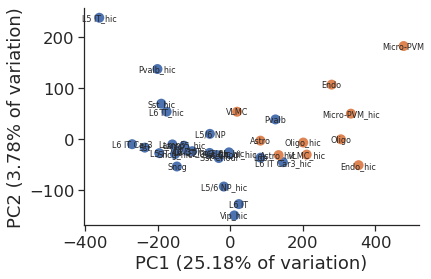

In [81]:


    
    pca = PCA(n_components=2, random_state=1)
    #proj_2d = pca.fit_transform(df_layer_scaled)
    proj_2d = pca.fit_transform(df.dropna(axis=1).fillna(0).values)
    #proj_2d = pca.fit_transform(R1)
    #umap_2d = UMAP(n_components=2, init='random', random_state=10)
    #proj_2d = umap_2d.fit_transform(features_sc)

    df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

    # Access explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    #df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
    df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df.index.tolist()]
    #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
    df_proj_2d['cell_type'] = df.index.tolist()
    #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



    ax = sns.scatterplot(
        x=df_proj_2d['PC1'],
        y=df_proj_2d['PC2'],
        hue=df_proj_2d['subclass'],
        s=100,
        linewidth=0, 
        legend=False # Remove legend box
    )
    # Initialize list to store labeled point positions
    labeled_points = []

    # Add text labels with adjusted positions to reduce overlap
    for i, row in df_proj_2d.iterrows():
        # Define offset values based on the scale of the plot and density of points
        x_offset = 0
        y_offset = 0
        # Check if label overlaps with any existing label
        #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        #    x_offset += 10
        #    y_offset += 10
        # Add label to the plot with adjusted positions
        plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
        # Record labeled point to avoid overlapping
        labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')


    # Show the plot
    #plt.show()
    plt.show()
    #plt.plot()

In [822]:
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer_scaled)

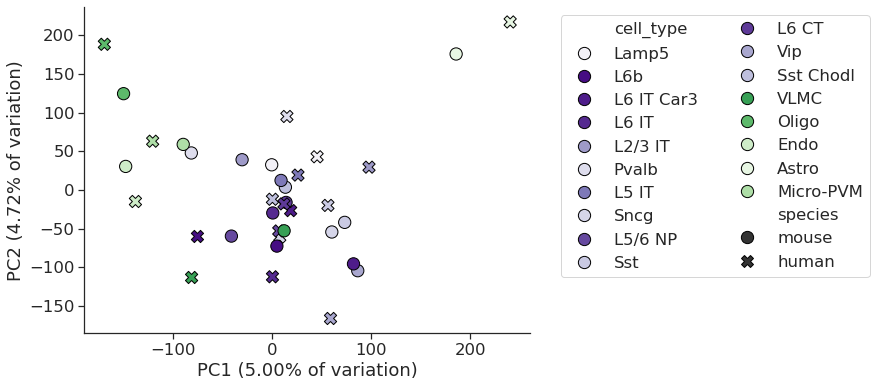

In [823]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming proj_2d is your PCA projection data and pca is your PCA object
df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

# Access explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Adding subclass and cell_type columns
#df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df_layer.index.tolist()]
df_proj_2d['cell_type'] = df_layer.index.tolist()
df_proj_2d = df_proj_2d.sort_values(by=['subclass'])
df_proj_2d['species'] = ['human' if x.split('_')[-1]=='hic' else 'mouse' for x in df_proj_2d['cell_type'].tolist()]
df_proj_2d['cell_type'] = [x.split('_hic')[0] for x in df_proj_2d['cell_type'].tolist()]
#df_proj_2d['cell_n'] = [compress_name_dict[x] for x in df_proj_2d['cell_type'].tolist()]

# Define your own subclass-to-color mapping
subclass_color_dict = {
    'N': 'blueviolet',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}
subclass_color_dict.update(color_map_n)
subclass_color_dict.update(color_map_nn)
subclass_color_dict.update(color_map_bl)
subclass_color_dict.update(color_map_ht)
#subclass_color_dict.update(color_map_IT)
#subclass_color_dict.update(color_map_nIT)
# Plotting
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cell_type',
    data=df_proj_2d,
    s=150,
    linewidth=1,
    edgecolor='black',
    style='species',
    
    palette=subclass_color_dict,  # Use the custom color palette
)

# Add text labels with adjusted positions to reduce overlap
#for i, row in df_proj_2d.iterrows():
#    plt.text(row['PC1'], row['PC2'], row['cell_n'], fontsize=8, ha='right')
    
# Initialize list to store labeled point positions
labeled_points = []

#Add text labels with adjusted positions to reduce overlap
for i, row in df_proj_2d.iterrows():
    # Define offset values based on the scale of the plot and density of points
    x_offset = 10
    y_offset = -30
    # Check if label overlaps with any existing label
    while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        x_offset += 5
        y_offset += 5
    # Add label to the plot with adjusted positions
    #plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=12, ha='right',va='baseline')
    # Record labeled point to avoid overlapping
    #labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_n']))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set labels for axes
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')

# Add a title to the plot
#plt.title('PCA Projection')

# Move the legend outside the plot
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

# Add gridlines for better readability
plt.grid(False)

# Show the plot
#plt.show()
#plt.tight_layout()
plt.savefig(f'/home/lohia/{species}_{marker_name}_{drop_duplicates}_{process_type}_pca_cross_species.pdf', transparent=True, bbox_inches='tight')


In [809]:
df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

In [811]:
df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df_layer.index.tolist()]
df_proj_2d['cell_type'] = df_layer.index.tolist()
df_proj_2d = df_proj_2d.sort_values(by=['subclass'])
df_proj_2d['species'] = ['human' if x.split('_')[-1]=='hic' else 'mouse' for x in df_proj_2d['cell_type'].tolist()]

In [812]:
df_proj_2d

PC1         PC2 subclass       cell_type species
0  -161.222913  -13.709507        N           Lamp5   mouse
25   -3.457637  -24.015726        N         L6b_hic   human
24  147.620249  -47.004177        N  L6 IT Car3_hic   human
23 -178.683960   57.966192        N       L6 IT_hic   human
22  -57.882004  -25.422647        N     L2/3 IT_hic   human
21 -204.134445  139.168158        N       Pvalb_hic   human
20 -366.579478  241.729175        N       L5 IT_hic   human
19 -154.996855  -24.730543        N        Sncg_hic   human
18 -129.545919   -9.501717        N       Lamp5_hic   human
34  -18.033228  -91.474713        N     L5/6 NP_hic   human
16  -56.211433    8.840861        N         L5/6 NP   mouse
15 -237.456392  -23.421048        N             Sst   mouse
14  -36.868463  -32.203917        N           L6 CT   mouse
13 -149.313161  -23.798195        N             Vip   mouse
12  -31.550823  -37.187784        N       Sst Chodl   mouse
30   -1.156116  -29.002810        N   Sst Chodl_hic   human
31   10.872397 -145.219651        N         Vip_hic   human
32 -106.431788  -21.006556        N       L6 CT_hic   human
33 -193.199863   74.487129        N         Sst_hic   human
7    84.826761  -33.189728        N             L6b   mouse
6  -273.188990  -16.836429        N      L6 IT Car3   mouse
5    23.665428 -122.820972        N           L6 IT   mouse
4  -119.900216  -25.080793        N         L2/3 IT   mouse
3   125.483543   43.118102        N           Pvalb   mouse
2  -197.440894  -30.024402        N           L5 IT   mouse
1  -148.657388  -55.577114        N            Sncg   mouse
29  214.360034  -35.217050       NN        VLMC_hic   human
28  204.738328  -10.473348       NN       Oligo_hic   human
17  282.652667  110.354161       NN            Endo   mouse
26  135.342699  -32.719212       NN       Astro_hic   human
11   18.886005   53.677419       NN            VLMC   mouse
10  308.674478    8.295388       NN           Oligo   mouse
9   483.382820  190.176704       NN       Micro-PVM   mouse
8    84.238974   -0.612746       NN           Astro   mouse
27  337.908582   42.002213       NN   Micro-PVM_hic   human
35  363.259006  -59.564718       NN        Endo_hic   human

In [759]:
['human' if x.split('_')[-1]=='hic' else 'mouse' for x in df_proj_2d['cell_type'].tolist()]

['mouse',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'human',
 'mouse',
 'mouse',
 'mouse',
 'mouse',
 'mouse',
 'human',
 'human',
 'human',
 'human',
 'mouse',
 'mouse',
 'mouse',
 'mouse',
 'mouse',
 'mouse',
 'mouse',
 'human',
 'human',
 'mouse',
 'human',
 'mouse',
 'mouse',
 'mouse',
 'mouse',
 'human',
 'human']

In [756]:
df_layer

bin_112012  bin_112012.1  bin_193654  bin_193654.1  \
cell_type                                                            
Lamp5            -0.153367     -0.153367   -1.418154     -1.418154   
Sncg              1.262806      1.262806    0.486028      0.486028   
L5 IT             0.886280      0.886280    0.062158      0.062158   
Pvalb            -0.042829     -0.042829    1.055164      1.055164   
L2/3 IT           1.651411      1.651411   -0.234237     -0.234237   
L6 IT             1.395355      1.395355   -1.064079     -1.064079   
L6 IT Car3       -0.309028     -0.309028    0.877982      0.877982   
L6b              -1.806419     -1.806419    0.326339      0.326339   
Astro             0.478270      0.478270   -0.815361     -0.815361   
Micro-PVM        -0.479626     -0.479626   -0.753982     -0.753982   
Oligo            -0.340375     -0.340375   -0.374631     -0.374631   
VLMC             -0.700423     -0.700423   -0.928423     -0.928423   
Sst Chodl         1.193260      1.193260    1.895320      1.895320   
Vip              -0.384850     -0.384850   -1.539660     -1.539660   
L6 CT             0.094658      0.094658   -0.205159     -0.205159   
Sst               0.080598      0.080598    1.792629      1.792629   
L5/6 NP          -0.735869     -0.735869   -0.199716     -0.199716   
Endo             -2.089852     -2.089852    1.037782      1.037782   
Lamp5_hic         2.278409      0.018588    1.151423      1.666650   
Sncg_hic         -0.304625     -0.498178   -1.013495      0.458194   
L5 IT_hic        -1.332151      0.540735    0.769524     -0.387879   
Pvalb_hic         0.610273      0.568459    0.706368     -0.331852   
L2/3 IT_hic      -0.328794     -0.433176    0.173833     -0.030714   
L6 IT_hic         0.996203      1.243542   -0.897682      0.075921   
L6 IT Car3_hic    0.590320     -0.931961   -0.743822     -0.609057   
L6b_hic           0.164872     -0.101183   -2.269982     -0.192622   
Astro_hic        -1.718897     -0.700469   -0.339339     -0.037017   
Micro-PVM_hic    -0.976450     -2.052209    0.832692     -0.477087   
Oligo_hic        -0.636624      0.655258    1.590397     -1.306666   
VLMC_hic         -0.365582     -1.364486   -0.409450      0.381142   
Sst Chodl_hic    -0.515115      0.004443    1.535149      2.560417   
Vip_hic           1.728262      1.345153   -0.367613     -1.345762   
L6 CT_hic         0.881558      0.697310    0.827487      0.463023   
Sst_hic          -0.402797      1.394959   -0.680844      1.208813   
L5/6 NP_hic       0.005051      1.074142    0.064841     -0.954563   
Endo_hic         -0.673912     -1.460929   -0.929484     -1.140942   

                bin_193654.2  bin_52252  bin_52252.1  bin_52252.2  bin_3933  \
cell_type                                                                     
Lamp5              -1.418154   1.566582     1.566582     1.566582 -0.772511   
Sncg                0.486028  -0.344640    -0.344640    -0.344640 -0.720573   
L5 IT               0.062158  -0.196661    -0.196661    -0.196661 -0.915533   
Pvalb               1.055164   0.842163     0.842163     0.842163 -0.333166   
L2/3 IT            -0.234237  -1.247518    -1.247518    -1.247518 -1.045014   
L6 IT              -1.064079   0.761842     0.761842     0.761842  1.476851   
L6 IT Car3          0.877982   0.320586     0.320586     0.320586 -0.204141   
L6b                 0.326339  -0.129866    -0.129866    -0.129866  0.725233   
Astro              -0.815361   1.573723     1.573723     1.573723  1.357166   
Micro-PVM          -0.753982  -2.612582    -2.612582    -2.612582 -0.491351   
Oligo              -0.374631  -0.387551    -0.387551    -0.387551  1.279498   
VLMC               -0.928423  -0.724804    -0.724804    -0.724804  1.044599   
Sst Chodl           1.895320  -0.309054    -0.309054    -0.309054 -0.560619   
Vip                -1.539660   1.381177     1.381177     1.381177 -0.790676   
L6 CT              -0.205159  -0.212234    -0.212234    -0.212234  0.742986   
Sst         

In [750]:
df_proj_2d

PC1         PC2 subclass       cell_type
0  -161.222913  -13.709507        N           Lamp5
25   -3.457637  -24.015726        N         L6b_hic
24  147.620249  -47.004177        N  L6 IT Car3_hic
23 -178.683960   57.966192        N       L6 IT_hic
22  -57.882004  -25.422647        N     L2/3 IT_hic
21 -204.134445  139.168158        N       Pvalb_hic
20 -366.579478  241.729175        N       L5 IT_hic
19 -154.996855  -24.730543        N        Sncg_hic
18 -129.545919   -9.501717        N       Lamp5_hic
34  -18.033228  -91.474713        N     L5/6 NP_hic
16  -56.211433    8.840861        N         L5/6 NP
15 -237.456392  -23.421048        N             Sst
14  -36.868463  -32.203917        N           L6 CT
13 -149.313161  -23.798195        N             Vip
12  -31.550823  -37.187784        N       Sst Chodl
30   -1.156116  -29.002810        N   Sst Chodl_hic
31   10.872397 -145.219651        N         Vip_hic
32 -106.431788  -21.006556        N       L6 CT_hic
33 -193.199863   74.487129        N         Sst_hic
7    84.826761  -33.189728        N             L6b
6  -273.188990  -16.836429        N      L6 IT Car3
5    23.665428 -122.820972        N           L6 IT
4  -119.900216  -25.080793        N         L2/3 IT
3   125.483543   43.118102        N           Pvalb
2  -197.440894  -30.024402        N           L5 IT
1  -148.657388  -55.577114        N            Sncg
29  214.360034  -35.217050       NN        VLMC_hic
28  204.738328  -10.473348       NN       Oligo_hic
17  282.652667  110.354161       NN            Endo
26  135.342699  -32.719212       NN       Astro_hic
11   18.886005   53.677419       NN            VLMC
10  308.674478    8.295388       NN           Oligo
9   483.382820  190.176704       NN       Micro-PVM
8    84.238974   -0.612746       NN           Astro
27  337.908582   42.002213       NN   Micro-PVM_hic
35  363.259006  -59.564718       NN        Endo_hic

In [207]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt
from pyranges import read_gtf


from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


#egad function

import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck




def calculate_overlap(df, df_b, corr_method):
    # Perform bin intersection
    bins_intersect = set(df.columns.tolist()).intersection(set(df_b.columns.tolist()))
    df = df.loc[:, bins_intersect]
    #df = df.fillna(0)
    #df_b = df_b.fillna(0)
    df_b = df_b.loc[:, bins_intersect]


    # Z-score normalization
    df_b_z = stats.zscore(df_b, axis=0, nan_policy='omit')
    df_b_z = pd.DataFrame(df_b_z, index=df_b.index.tolist(), columns=df_b.columns)
    df_b_z['cell_type'] = df_b_z.index.tolist()
    df_b_z = df_b_z.set_index(['cell_type'])

    df_z = stats.zscore(df, axis=0, nan_policy='omit')
    df_z = pd.DataFrame(df_z, index=df.index.tolist(), columns=df.columns)
    df_z['cell_type'] = df_z.index.tolist()
    df_z['cell_type'] = [x + '_hic' for x in df_z['cell_type']]
    df_z = df_z.set_index(['cell_type'])
    

    # Concatenate dataframes
    df_corr = pd.concat([df_b_z, df_z])

    
    
    #df_corr = df_corr.dropna(axis=1, how='all')
    #df_corr = df_corr.dropna(axis=1)
    
    #df_corr = df_corr.set_index(['cell_type'])

            
    #features_sc = stats.zscore(df_corr, axis=0, nan_policy='omit')
    
    #features_sc = features_sc.dropna(how='all', axis=1).fillna(0)
    
    #features_sc = features_sc.dropna(how='all', axis=1)
    
                
    #df_dist_df = features_sc.T.corr(min_periods=200, method=corr_method)
    #df_dist_df = df_corr.T.corr(min_periods=10, method=corr_method)



    return df_corr



cell_type_map = {
 'Adipocyte' : 'Adipocytes',
 'Atrial Cardiomyocyte': 'Cardiomyocytes',
 'Ventricular Cardiomyocyte':'Immature_Cardiomyocytes',
 'Endothelial': 'Endothelial_Other' ,
 'Fibroblast': 'Fibroblasts',
 'Smooth Muscle': 'Smooth_Muscle_Cells',
 'Lymphocyte': 'Lymphoid_Immune_Cells',
 'Macrophage': 'Myeloid_Immune_Cells',
 'Nervous': 'Neuronal_Cells',}
        

#for each marker-list and input file , I can make one output file

def calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name):
    

        adata = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
        adata_b = ad.read_h5ad(f'{input_file_another_exp_h5ad}', backed='r')
        df_b = adata_b.to_df()
        df = adata.to_df()
        
        if marker_name == 'brain_heart':
            df_b.index = [cell_type_map[x] for x in df_b.index.tolist()]

        

        cell_type_intersect = df.index.intersection(df_b.index)


        #df_b = df_b.loc[cell_type_intersect,:]
        

        np_of_col = len(cell_type_intersect)*2
        np_of_rows = len(cell_type_intersect)*2
        
        adata_l = ad.AnnData(np.zeros((np_of_rows, np_of_col)))

        
        layer_names = adata.layers.keys()    
        for corr_method in ['pearson']:
                        for given_layer in layer_names:
                        #for given_layer in accepted_layer_list:
                        
                                df = adata.to_df(layer=given_layer)

                                df = df.loc[cell_type_intersect,:]
                                
                                df_concat = calculate_overlap(df, df_b, corr_method)
                                
                                df_concat.to_csv(outputfile_h5ad)



In [237]:

no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
no_of_markers_list = [200]
for no_of_markers in no_of_markers_list:




    for species in ['mouse']:
        for process_type in ['inter']:
            for resolution in ['10kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False]:
                        for marker_name in ['brain_class']:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 

                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #input_file_another_exp_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/zemke_brain.h5ad'
                                #outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'


                                #calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)

                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'                            
                                input_file_another_exp_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/compartment.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_compartment_coverlap_matrix.h5ad'
                                
                                if os.path.isfile(outputfile_h5ad):
                                    os.remove(outputfile_h5ad)
                                    calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)
                                else:
                                    calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)





In [238]:
df = pd.read_csv(outputfile_h5ad).set_index('cell_type')

df_dict = pd.DataFrame(list(class3_dict.items()), columns=['name', 'subclass'])

#df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['IT', 'nIT'])]['name'].tolist())]

df_layer = df.dropna(axis=1, how='all')
scaler = StandardScaler()
scaler.fit(df_layer)

df_layer_scaled = scaler.transform(df_layer)

#df_layer_scaled = df_layer_scaled.fillna(0)
df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

In [239]:


    
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer_scaled)
    #proj_2d = pca.fit_transform(R1)
    #umap_2d = UMAP(n_components=2, init='random', random_state=10)
    #proj_2d = umap_2d.fit_transform(features_sc)

    df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

    # Access explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    #df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
    df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df_layer.index.tolist()]
    #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
    df_proj_2d['cell_type'] = df_layer.index.tolist()
    #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



    ax = sns.scatterplot(
        x=df_proj_2d['PC1'],
        y=df_proj_2d['PC2'],
        hue=df_proj_2d['subclass'],
        s=100,
        linewidth=0, 
        legend=False # Remove legend box
    )
    # Initialize list to store labeled point positions
    labeled_points = []

    # Add text labels with adjusted positions to reduce overlap
    for i, row in df_proj_2d.iterrows():
        # Define offset values based on the scale of the plot and density of points
        x_offset = 0
        y_offset = 0
        # Check if label overlaps with any existing label
        #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        #    x_offset += 10
        #    y_offset += 10
        # Add label to the plot with adjusted positions
        plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
        # Record labeled point to avoid overlapping
        labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')


    # Show the plot
    #plt.show()
    plt.show()
    #plt.plot()

KeyError: 'L4 RSP-ACA'

In [1]:
#heatmaps for matching with experiment

In [437]:
no_of_markers_list = [200]    
for no_of_markers in no_of_markers_list:

    for species in ['mouse']:
        for process_type in ['inter']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['brain_class']

            for shuf in [False]:
                for drop_duplicates in [False]:
                    for marker_name in marker_name_list:
                        if process_type == 'intra':
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw', '10kbp_raw']
                        else:
                            resolution_list = ['100kbp_raw']
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'



In [438]:
adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')

df = adata.to_df(layer='mean_pearson')

df_layer = df.copy()

In [439]:

df_layer = df_layer[df_layer.index.isin(class2_dict.keys())]

col_list = [x+'_hic' for x in df_layer.index.tolist()]

df_layer = df_layer[col_list]

df_layer = df_layer.T

df_layer.index = df_layer.columns.tolist()

df_layer = df_layer.T

[]

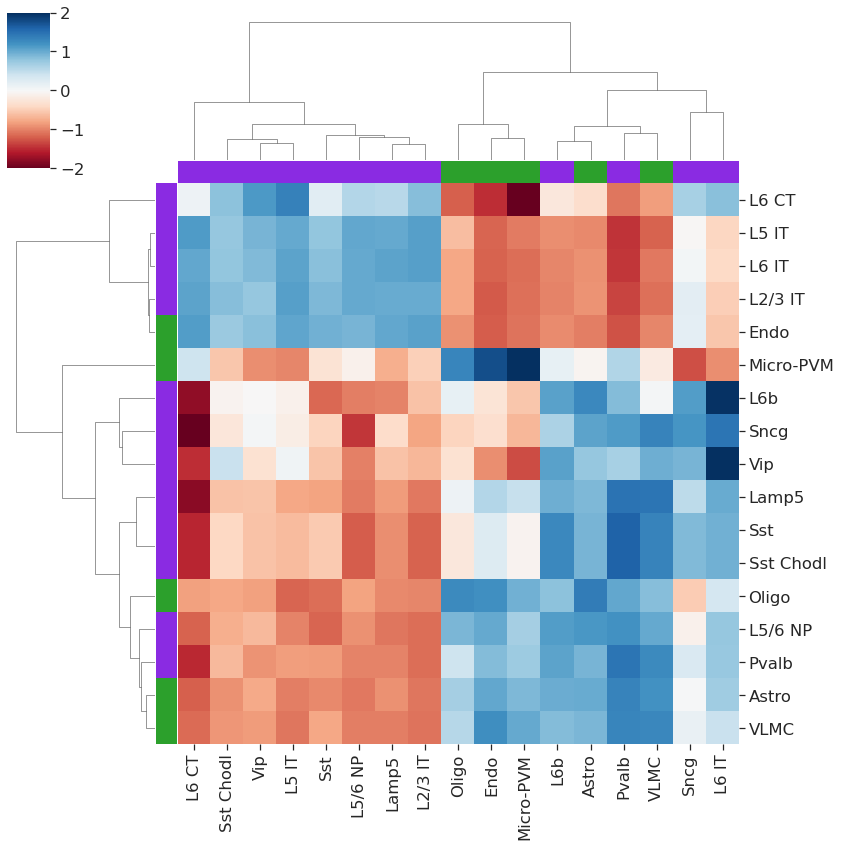

In [440]:
unique_classes = list(set(class2_dict.values()))
palette = sns.color_palette('Set1', len(unique_classes))
class_color_map = {
    'N': 'blueviolet',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}

# Map the class_dict to colors
row_colors = df_layer.index.map(class2_dict).map(class_color_map)

# Create the clustermap
#ax = sns.clustermap(df_layer,figsize=(12,12),  cmap='RdBu', z_score=0,col_cluster=False,row_cluster=False, vmin=-3,vmax=3 )
ax = sns.clustermap(df_layer,figsize=(12,12), row_colors=row_colors,col_colors=row_colors, cmap='RdBu', z_score=0,col_cluster=True,row_cluster=True, vmin=-2,vmax=2 )
#sns.clustermap(df_layer,figsize=(12,12), row_colors=row_colors, cmap='RdBu',col_colors=row_colors, z_score=0,col_cluster=False,row_cluster=False, vmin=-2, vmax=2 )
#sns.clustermap(df_layer,figsize=(12,12), cmap='RdBu', col_cluster=False, row_cluster=False, z_score=0)
#sns.clustermap(df_layer,figsize=(12,12), cmap='viridis')
#plt.show()
ax.savefig(f'/home/lohia/{species}_{process_type}_{marker_name}_atac.pdf')
plt.plot()
#col is Hi-C
#row is experiment


In [248]:
!pwd

/home/lohia


In [ ]:
#plots with CRE modules overlap

In [296]:
df_list_egad = []
no_of_markers_list = [200]     
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['intra']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['brain_class']

            for shuf in [False]:
                for drop_duplicates in [False]:
                    for marker_name in marker_name_list:
                        if process_type == 'intra':
                            resolution_list = [ '1kbp_raw']
                        else:
                            resolution_list = ['10kbp_raw']
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'



In [297]:
adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')

In [298]:
adata.layers

Layers with keys: counts, mean

In [299]:
def calculate_category_means_ignore_nan(gene_observation_matrix_df, gene_category_matrix_df):
    # Calculate mean for each category (axis=0) and each observation (axis=1), ignoring NaN values


    genes_intersect = gene_observation_matrix_df.index.intersection(gene_category_matrix_df.index)

    gene_observation_matrix_df =  gene_observation_matrix_df.loc[genes_intersect, :]
    gene_category_matrix_df = gene_category_matrix_df.loc[genes_intersect, :]

    gene_observation_matrix = gene_observation_matrix_df.values
    gene_category_matrix = gene_category_matrix_df.values

    category_counts = np.dot(gene_category_matrix.T, ~np.isnan(gene_observation_matrix))
    
    gene_observation_matrix_cleaned = np.nan_to_num(gene_observation_matrix, nan=0.0)
    
    category_sums = np.dot(gene_category_matrix.T, gene_observation_matrix_cleaned)
    
    # Calculate mean using only non-NaN values
    category_means = category_sums / category_counts
    
    # Replace NaN values in category_means with 0 where division by 0 occurred
    #category_means[np.isnan(category_means)] = 0.0
    
    return category_means, category_counts

In [300]:
                if species == 'human':
                    max_bins = 38

                    module_path = '/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/catlas_ccre/human/li2023/tables10_cis_modules.bed'

                    os.system(f"bedtools intersect -wo -a {module_path} -b {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed")
                    df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed', sep='\t', names=['c','d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id', 'overlap'])
                else:
                    max_bins = 151
                    module_path = '/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/catlas_ccre/mouse/Zu_nature2023/'


                    df = pd.read_csv(f'{module_path}/s10_cre_modules.txt', sep='\t')

                    import re
                    df['chrom'] = [re.split(":|-", x)[0] for x in df['cCRE']]
                    df['st'] = [re.split(":|-", x)[1] for x in df['cCRE']]
                    df['end'] = [re.split(":|-", x)[2] for x in df['cCRE']]

                    df[['chrom', 'st', 'end', 'module']].to_csv(f'{module_path}/s10_cre_modules.bed',index=False, header=False, sep='\t')
                    os.system(f"bedtools intersect -wo -a {module_path}/s10_cre_modules.bed -b {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed")
                    df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed', sep='\t', names=['d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id', 'overlap'])


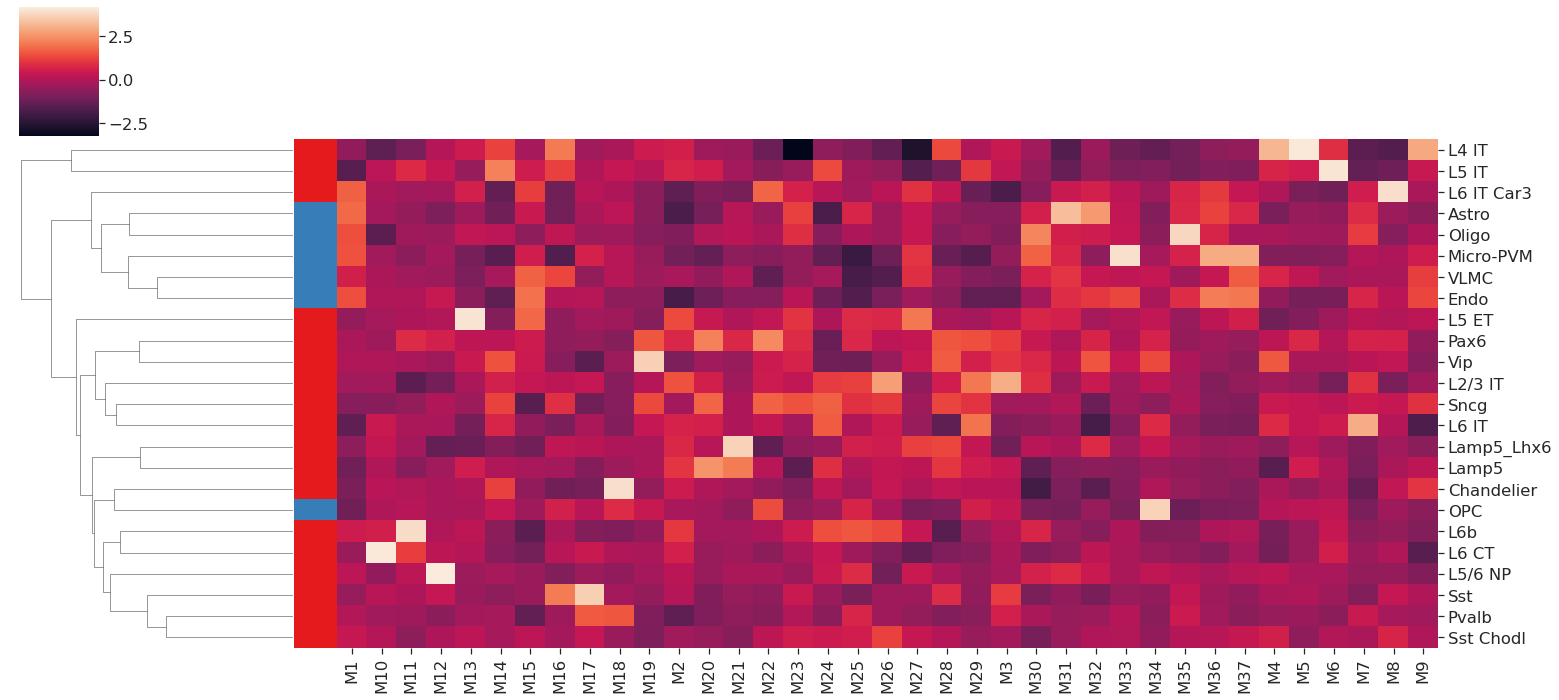

In [301]:
df_hba_modules['bin_id'] = ['bin_'+str(x) for x in df_hba_modules['bin_id'].tolist()]

df_hba_modules['rank'] = 1

marker_table = pd.pivot_table(df_hba_modules, columns='ccre', index='bin_id', values='rank', aggfunc='sum')
marker_table.fillna(0, inplace=True)

marker_table[marker_table != 0] = 1

df_input = adata.to_df(layer='mean').T

category_means, category_counts =  calculate_category_means_ignore_nan(df_input, marker_table)

df = pd.DataFrame(data=category_means,    # values
index=marker_table.columns.tolist(),    # 1st column as index
columns=df_input.columns.tolist()) 

df = df.T

class_color_map = {
    'N': '#1f77b4',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}

# Map the class_dict to colors
row_colors = df_layer.index.map(class2_dict).map(class_color_map)


#unique_classes = list(set(class2_dict.values()))
#palette = sns.color_palette('Set1', len(unique_classes))
#class_color_map = dict(zip(unique_classes, palette))

# Map the class_dict to colors

row_colors = df.index.map(class2_dict).map(class_color_map)

sns.clustermap(df,col_cluster=False,row_cluster=True, z_score=1, row_colors=row_colors,yticklabels=True, figsize=(22,10))



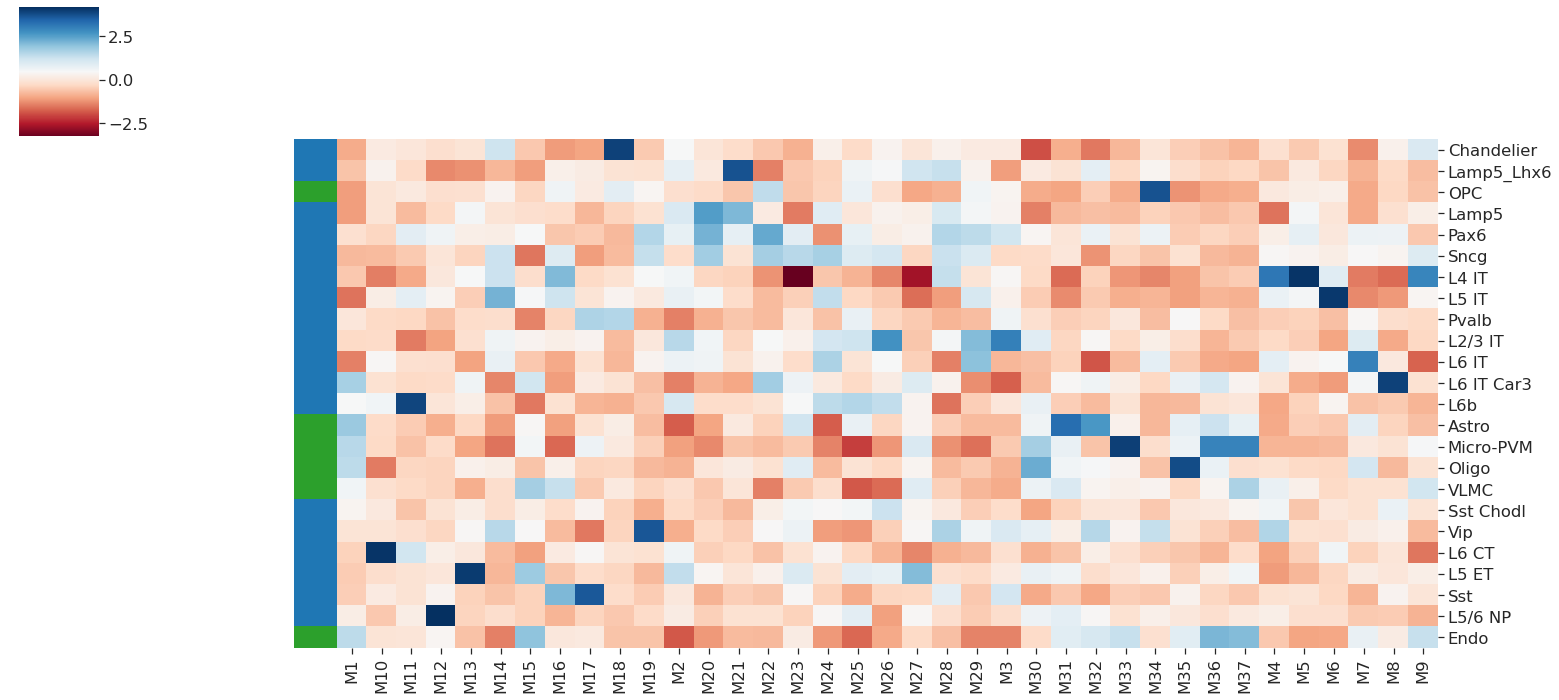

In [312]:
class_color_map = {
    'N': '#1f77b4',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}

# Map the class_dict to colors
row_colors = df_layer.index.map(class2_dict).map(class_color_map)


#unique_classes = list(set(class2_dict.values()))
#palette = sns.color_palette('Set1', len(unique_classes))
#class_color_map = dict(zip(unique_classes, palette))

# Map the class_dict to colors

row_colors = df.index.map(class2_dict).map(class_color_map)

sns.clustermap(df,col_cluster=False,row_cluster=False, z_score=1, row_colors=row_colors,yticklabels=True, figsize=(22,10), cmap='RdBu')



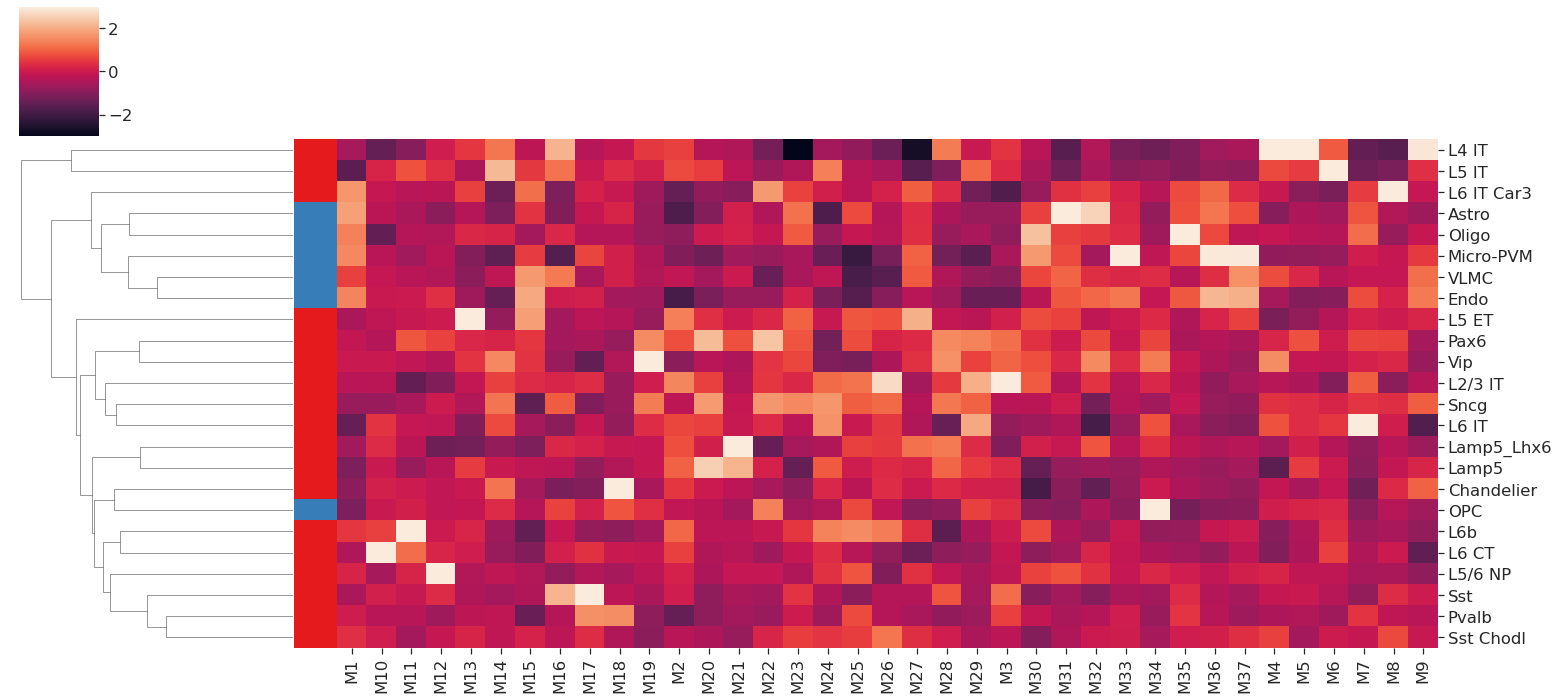

In [308]:
sns.clustermap(df,row_cluster=True, z_score=1, row_colors=row_colors,yticklabels=True, figsize=(22,10), vmin=-3, vmax=3, col_cluster=False)



In [ ]:
# gtex figure plots

In [1329]:
no_of_markers_list = [200]     
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['inter']:
            if species == 'human':
                marker_name_list = ['brain_heart']

            else:
                marker_name_list = ['brain_heart']

            for shuf in [False]:
                for drop_duplicates in [False]:
                    for marker_name in marker_name_list:
                        if process_type == 'inter':
                            resolution_list = [ '40kbp_raw']
                        else:
                            resolution_list = ['10kbp_raw']
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'



In [951]:
snp_pos = pd.read_csv('/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.txt.gz', sep='\t')


snp_pos['chr'] = [x.split(':')[0] for x in snp_pos['SNP_id_hg38']]

snp_pos['bin_st'] = [x.split(':')[1] for x in snp_pos['SNP_id_hg38']]

snp_pos['bin_end'] = snp_pos['bin_st']

snp_pos[['chr', 'bin_st', 'bin_end', 'SNP']].to_csv('/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.bed', sep='\t', header=False, index=False)


os.system(f"bedtools intersect -wo -b /grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.bed -a {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bin_snp_position.bed")


0

In [1330]:
snp_pos = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bin_snp_position.bed', sep='\t', names=['d', 'd1', 'd2', 'bin_id', 'c', 'c1', 'c2', 'SNP', 'c4'] )


In [1331]:
snp_pos  = snp_pos.drop_duplicates(['SNP'])

adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')

In [1333]:
all_dis_snp_list = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]
        df_all_eqtl = df_all_eqtl.drop_duplicates('bin_id')
        df_all_eqtl['md'] = dis_name
        all_dis_snp_list.append(df_all_eqtl)



In [1334]:
all_dis_snp = pd.concat(all_dis_snp_list)

all_dis_snp = all_dis_snp.drop_duplicates('bin_id')

bin_md_dict = dict(zip(all_dis_snp['bin_id'], all_dis_snp['md']))

bins_eqtl = all_dis_snp['bin_id'].tolist()

In [1357]:
        dk = adata.to_df(layer='mean')
        #dk = dk.dropna(axis=1)
        my_val=2


        
        

        features = dk.T.reindex(bins_eqtl).T
        features = features.dropna(axis=1)
        
        
        
       

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]
        features = features[~features.index.isin(['Immature_other', 'Immature_Cardiomyocytes', 'Pericytes_Stromal', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Endothelial_Other'])]
        features = features.drop(columns=['subclass'])
        #print (features)

        z_scores = stats.zscore(features, axis=0, nan_policy='omit')

        

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

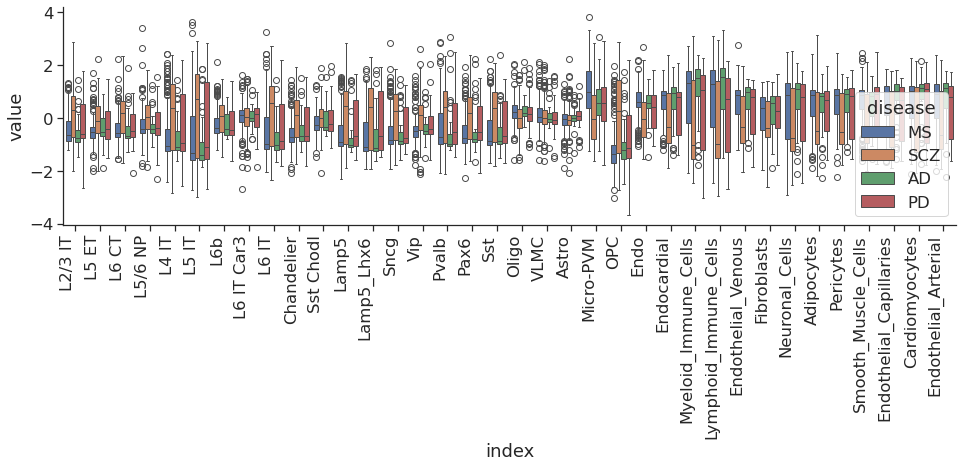

In [1359]:
        features = pd.DataFrame(data=z_scores,
                          index=features.index,
                          columns=features.columns)
      
        


        features = pd.melt(features.reset_index(), id_vars='index', var_name='feature', value_name='value')
        
       







                           


        features['subclass'] = [class4_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])

        features['disease'] = [bin_md_dict[x] for x in features['feature']]


        
        plt.figure(figsize=(16, 4))
        #ax=sns.boxplot(data=features, x=features.index, hue='subclass')
        ax=sns.boxplot(data=features, y='value',x='index', hue='disease')
        plt.xticks(rotation=90, ha='right')
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Adjust rotation angle as needed
        

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

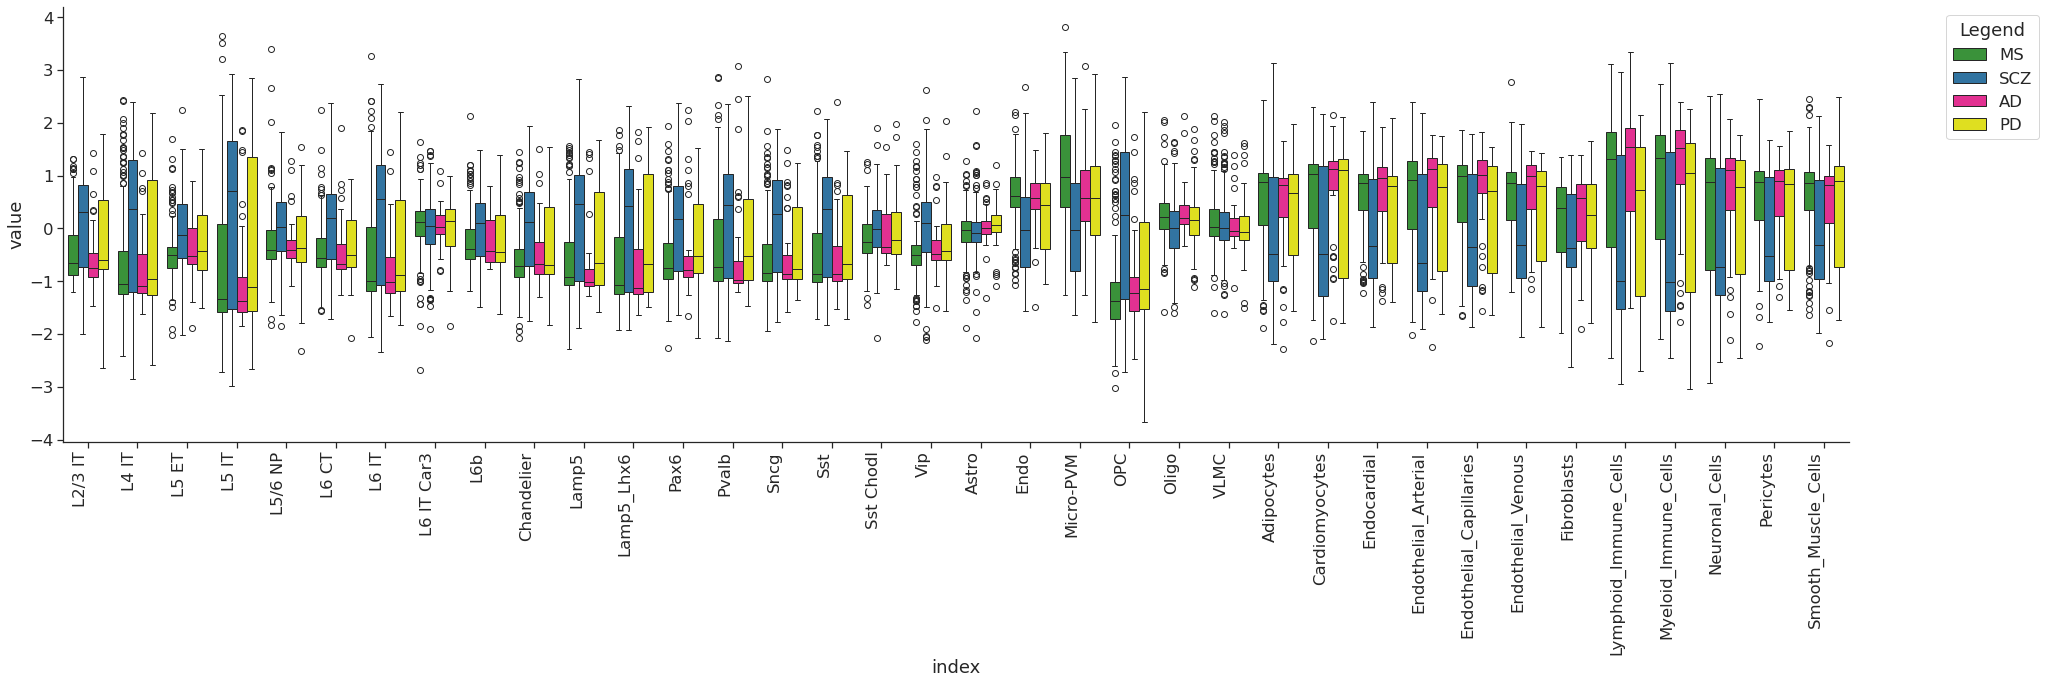

In [1360]:
plt.figure(figsize=(32, 8))
features = features.sort_values(by=['subclass', 'index'])
#sns.scatterplot(data=df2.reset_index() , x='index', y='value', hue='disease')
sns.boxplot(data=features , x='index', y='value', hue='disease', palette=subclass_color_dict)
#sns.lineplot(data=features , x='index', y='value', hue='disease')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
dt = features.groupby(['index', 'disease', 'subclass']).median().reset_index()
#plt.figure(figsize=(32, 8))
dt = dt.sort_values(by=['subclass', 'index'])
#sns.lineplot(data=dt , x='index', y='value', hue='disease', palette=subclass_color_dict)
plt.xticks(rotation=90, ha='right')
#sns.lineplot(data=features, y='value',x='index', hue='disease')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

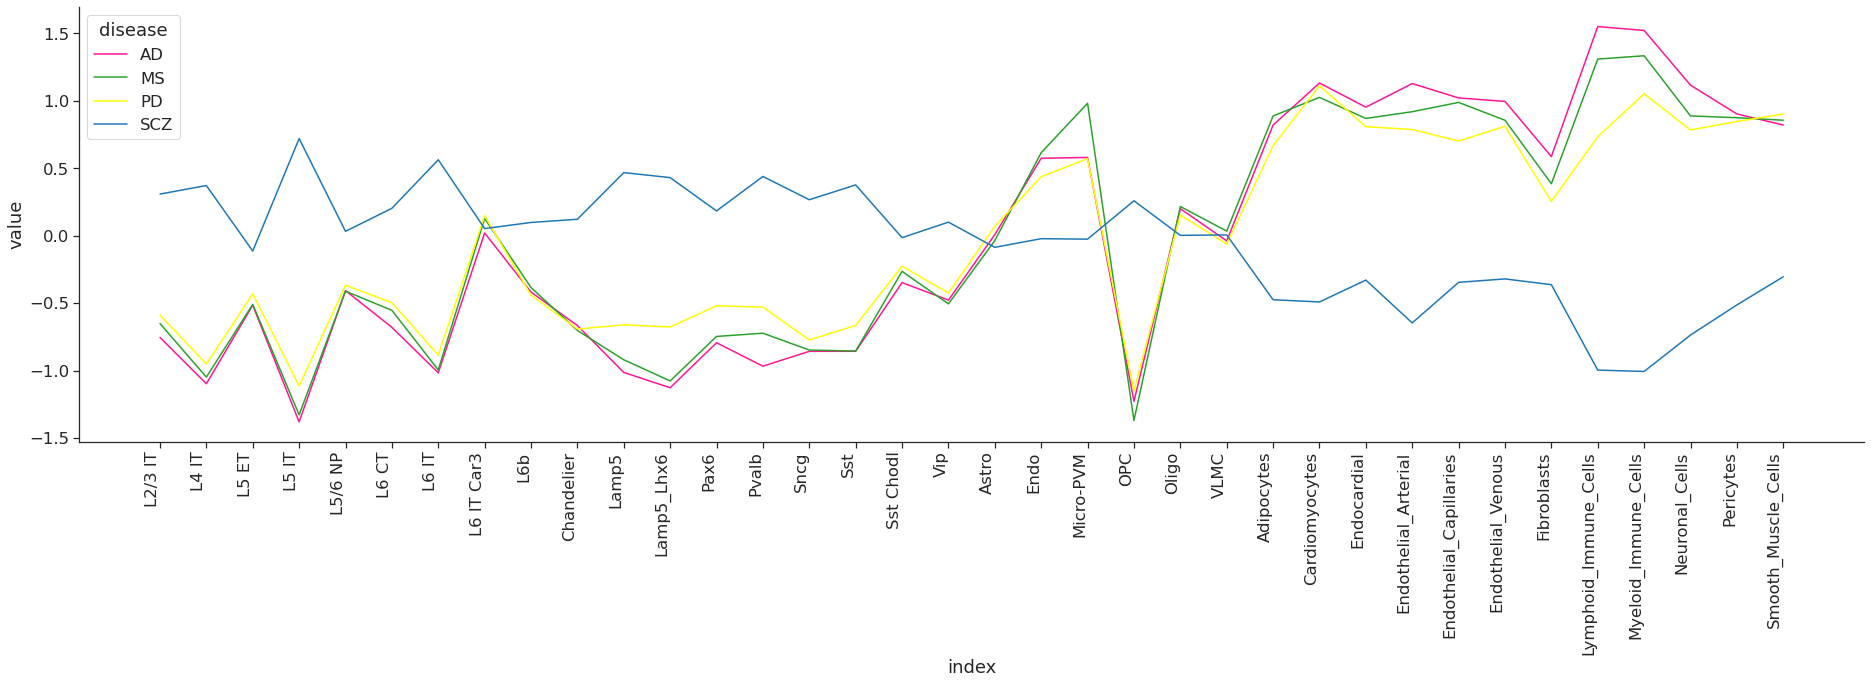

In [1361]:
plt.figure(figsize=(32, 8))
features = features.sort_values(by=['subclass', 'index'])
#sns.scatterplot(data=df2.reset_index() , x='index', y='value', hue='disease')
#sns.boxplot(data=features , x='index', y='value', hue='disease', palette=subclass_color_dict)
#sns.lineplot(data=features , x='index', y='value', hue='disease')
#plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
dt = features.groupby(['index', 'disease', 'subclass']).median().reset_index()
#plt.figure(figsize=(32, 8))
dt = dt.sort_values(by=['subclass', 'index'])
sns.lineplot(data=dt , x='index', y='value', hue='disease', palette=subclass_color_dict)
plt.xticks(rotation=90, ha='right')
#sns.lineplot(data=features, y='value',x='index', hue='disease')

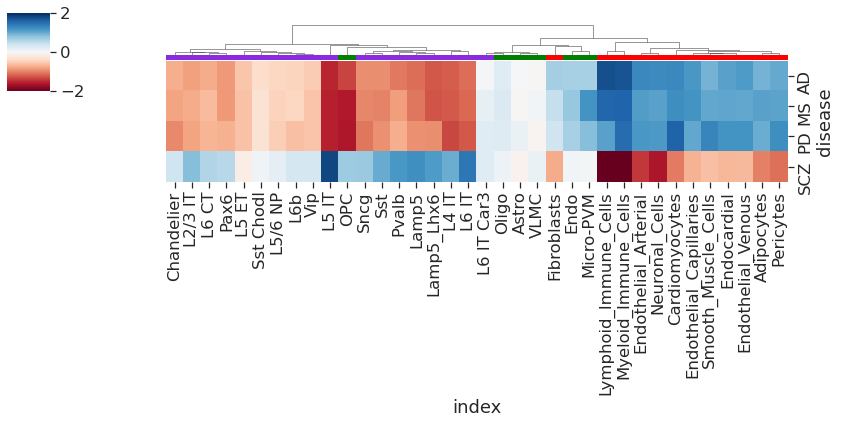

In [1385]:
ft = pd.pivot_table(data=dt,index='index', columns='disease', values='value')
ft = ft.T
col_colors = ft.index.map(subclass_color_dict)
row_colors = ft.columns.map(class2_dict).map(subclass_color_dict)
#sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-2,vmax=2)
sns.clustermap(ft, col_colors=row_colors,cmap='RdBu',xticklabels=True, figsize=(12,6), z_score=0, row_cluster=False, vmin=-2, vmax=2)


In [1310]:
features

index    feature     value subclass disease
5985   L2/3 IT  bin_12341  0.737877       IT     SCZ
1593   L2/3 IT  bin_19219 -0.044665       IT     SCZ
5337   L2/3 IT  bin_42402  0.291982       IT     SCZ
12705  L2/3 IT  bin_51911 -0.147694       IT      PD
7257   L2/3 IT  bin_46869 -0.614106       IT      MS
...        ...        ...       ...      ...     ...
6996       L6b  bin_68987  0.401994      aIT      MS
11412      L6b  bin_17512 -0.317868      aIT      AD
3828       L6b  bin_56590  0.552169      aIT     SCZ
9588       L6b  bin_68868  0.798507      aIT      MS
3804       L6b  bin_56589 -0.335880      aIT     SCZ

[13632 rows x 5 columns]

<AxesSubplot:xlabel='index', ylabel='value'>

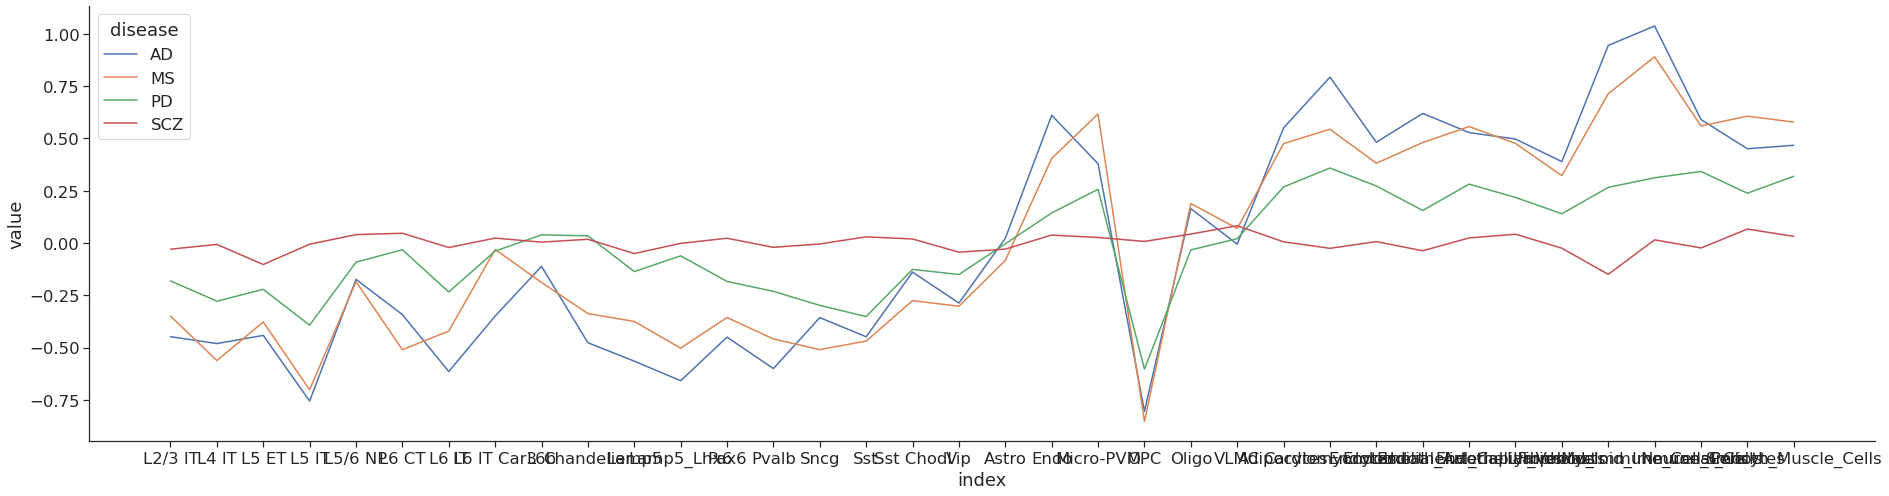

In [1328]:
dt = features.groupby(['index', 'disease', 'subclass']).mean().reset_index()
plt.figure(figsize=(32, 8))
dt = dt.sort_values(by=['subclass', 'index'])
sns.lineplot(data=dt , x='index', y='value', hue='disease')

/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


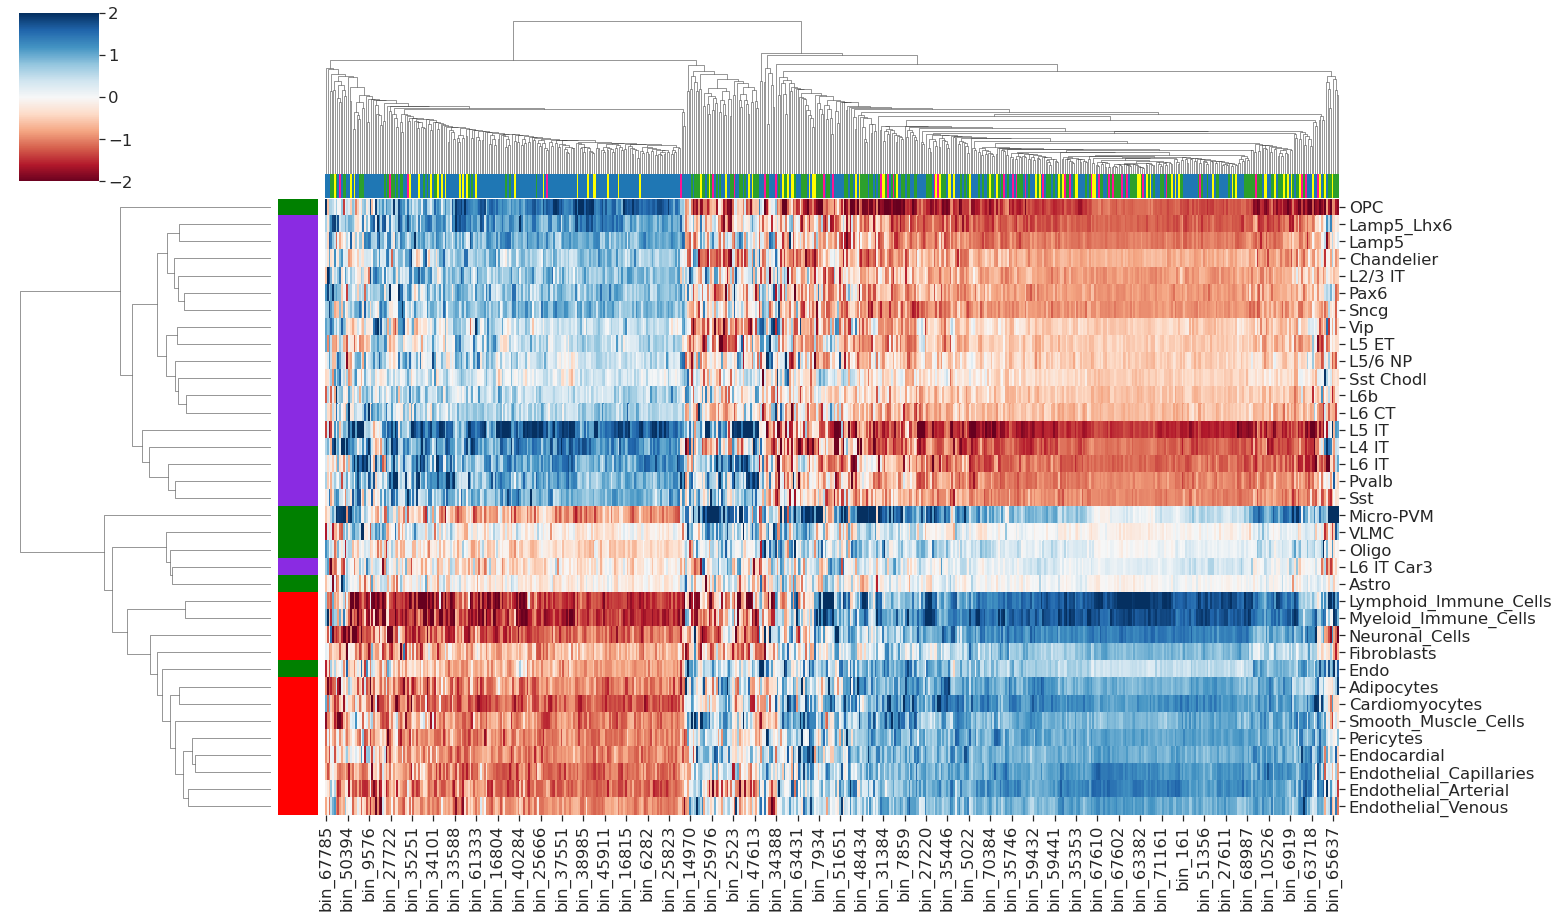

In [1358]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define your own subclass-to-color mapping
subclass_color_dict = {
    'SCZ': '#1f77b4',  # Blue
    'MS': '#2ca02c',  # Orange
    'AD': 'deeppink',  # Green
    'PD': 'yellow',  # Green'SCZ', 'MS', 'AD', 'PD'
    'N' : 'blueviolet',
    'NN' : 'Green',
    'heart': 'Red'
    # Add more subclasses and their corresponding colors here
}

col_colors = features.columns.map(bin_md_dict).map(subclass_color_dict)
row_colors = features.index.map(class2_dict).map(subclass_color_dict)
sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-2,vmax=2)


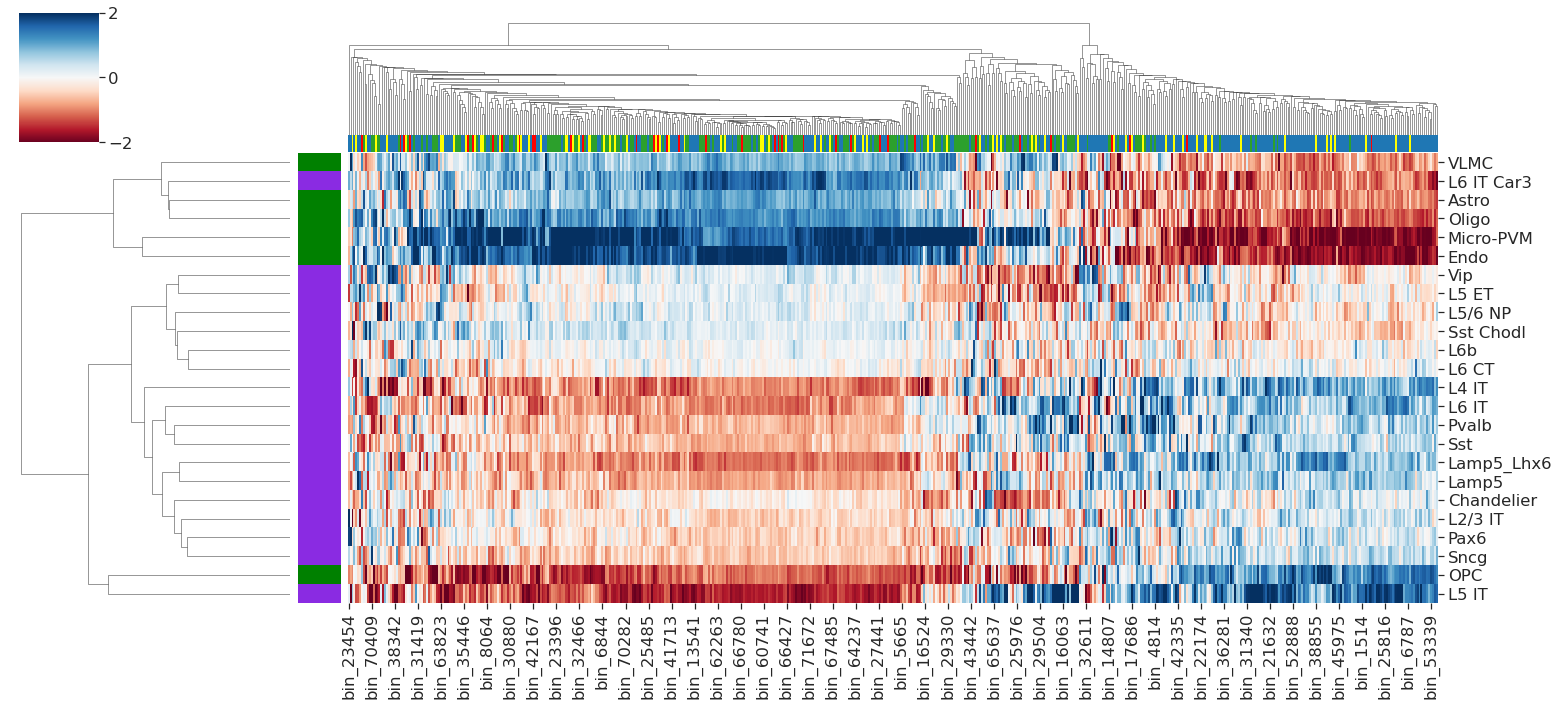

In [1261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define your own subclass-to-color mapping
subclass_color_dict = {
    'SCZ': '#1f77b4',  # Blue
    'MS': '#2ca02c',  # Orange
    'AD': 'red',  # Green
    'PD': 'yellow',  # Green'SCZ', 'MS', 'AD', 'PD'
    'N' : 'blueviolet',
    'NN' : 'Green',
    'heart': 'Red'
    # Add more subclasses and their corresponding colors here
}

col_colors = features.columns.map(bin_md_dict).map(subclass_color_dict)
row_colors = features.index.map(class2_dict).map(subclass_color_dict)
sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,10), cmap='RdBu', z_score=1, vmin=-2,vmax=2)


In [1138]:
row_colors

Index(['deepviolet', 'deepviolet', 'Green', 'deepviolet', 'deepviolet',
       'deepviolet', 'deepviolet', 'deepviolet', 'deepviolet', 'deepviolet',
       'deepviolet', 'deepviolet', 'deepviolet', 'Green', 'Green', 'Green',
       'Green', 'deepviolet', 'deepviolet', 'deepviolet', 'deepviolet',
       'deepviolet', 'deepviolet', 'Green'],
      dtype='object')

In [ ]:
feature_list = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]
        df_all_eqtl = df_all_eqtl.drop_duplicates(by='bin_id')
        df_all_eqtl['md'] = dis_name

        bins_eqtl = df_all_eqtl['bin_id'].tolist()
        
        #dk = adata.to_df(layer='gw_inter_0_z_scores_500_False_False_mean')
        dk = adata.to_df(layer='mean')
        #dk = dk.dropna(axis=1)
        my_val=2

        bins_eqtl = list(set(bins_eqtl))
        print (len(bins_eqtl))
        
        

        features = dk[bins_eqtl]
        
       

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]

        
        features = features[~features.index.isin(['Immature_other', 'Immature_Cardiomyocytes', 'Pericytes_Stromal', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Endothelial_Arterial', 'Endothelial_Venous', 'Endothelial_Capillaries'])]


        #features = features[features['subclass'] != 'heart']
        
        

        features = features.drop(columns=['subclass'])
        #print (features)

        z_scores = stats.zscore(features, axis=1, nan_policy='omit')

        
        #features = features[features>2]

        features=features.fillna(0)

        #fr = bottleneck.nanrankdata(features, axis=0)
        
        #fr = stats.rankdata(features, axis=0, method='ordinal')

        #fr = fr/bottleneck.nanmax(fr, axis=0)

        features = pd.DataFrame(data=z_scores,
                          index=features.index,
                          columns=features.columns)
      
        
        features = pd.melt(features.reset_index(), id_vars='index', var_name='feature', value_name='value')
        
       






        features['subclass'] = [class2_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])
                           
        features['disease'] = dis_name
        features['no_of_snps'] = len(bins_eqtl)
        
        
        feature_list.append(features)
        
        plt.figure(figsize=(16, 4))
        #ax=sns.boxplot(data=features, x=features.index, hue='subclass')
        ax=sns.boxplot(data=features, y='value',x='index', hue='subclass')
        plt.xticks(rotation=90, ha='right')
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Adjust rotation angle as needed
        
        plt.show()


        


        

In [1049]:
snp_df = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]
        df_all_eqtl = df_all_eqtl.drop_duplicates(['bin_id'])
        snp_df.append(df_all_eqtl)


In [1051]:
pd.concat(snp_df).drop_duplicates('bin_id')

locus             closest_gene    GWAS_snp  \
0   chr15:91392256_91443059                    FURIN      rs4702   
1    chr2:97328989_98244689                   FAHD2B   rs7575796   
2   chr15:40550149_40603259                     PAK6  rs56205728   
3    chr9:96076318_96480242                  FAM120A   rs6479487   
4   chr19:11681825_11943697                   ZNF823  rs72986630   
..                      ...                      ...         ...   
77  chr16:52944753_53052251          ENSG00000277639  rs10221156   
78  chr11:10519870_10737173                   RNF141   rs7938782   
79  chr16:19244424_19280235                    SYT17   rs6497339   
80    chr20:5899609_6103587  ENSG00000286235 - CRLS1  rs77351827   
81  chr13:97642282_98116044                    MBNL2   rs4771268   

      GWAS_snp_pos  beta_top_GWAS      symbol          ensembl  nsnps  \
0   chr15:91426560       0.080298       FURIN  ENSG00000140564     88   
1    chr2:97746526       0.096900      ACTR1B  ENSG00000115073    574   
2   chr15:40567237      -0.057502     ZFYVE19  ENSG00000166140     94   
3    chr9:96237373      -0.058700   FAM120AOS  ENSG00000188938    989   
4   chr19:11849736      -0.111703      ZNF823  ENSG00000197933    492   
..             ...            ...         ...              ...    ...   
77  chr16:52969426      -0.078200        TOX3  ENSG00000103460    301   
78  chr11:10558777       0.067400      RNF141  ENSG00000110315    400   
79  chr16:19277493       0.057400     CLEC19A  ENSG00000261210     80   
80   chr20:6006041       0.042900  AL118505.1  ENSG00000278192    520   
81  chr13:97865021       0.043200       FARP1  ENSG00000152767    360   

       PP.H0.abf  PP.H1.abf  ...  beta_gwas  beta_eqtl  beta_smr  \
0   3.400000e-20   0.000278  ...   0.080298  -0.211500 -0.379660   
1   1.310000e-05   0.002198  ...  -0.095101   0.403164 -0.235887   
2   5.240000e-06   0.008560  ...   0.057502   0.308111  0.186628   
3   9.540000e-07   0.000338  ...   0.057905   0.328901  0.176055   
4   8.400000e-06   0.028467  ...   0.111703   0.580255  0.192506   
..           ...        ...  ...        ...        ...       ...   
77  8.265114e-01   0.016217  ...  -0.067400  -0.374178  0.180128   
78  1.890713e-01   0.005344  ...  -0.008900   0.484533 -0.018368   
79  9.321855e-01   0.012503  ...   0.050300   0.241626  0.208173   
80  7.159298e-01   0.022790  ...  -0.032900   0.340586 -0.096598   
81  9.487435e-01   0.018196  ...  -0.071400   0.166854 -0.427919   

    prop_pos_direction              tissue  type  coloc_method  \
0             0.090909  Excitatory neurons  eQTL          beta   
1             0.177700  Excitatory neurons  eQTL          beta   
2             0.872340          Astrocytes  eQTL          beta   
3             0.772497    Oligodendrocytes  eQTL          beta   
4             0.711382  Excitatory neurons  eQTL          beta   
..                 ...                 ...   ...           ...   
77            0.930233         OPCs / COPs  eQTL          beta   
78            0.587500    Oligodendrocytes  eQTL          beta   
79            0.962500  Excitatory neurons  eQTL          beta   
80            0.500000         OPCs / COPs  eQTL          beta   
81            0.319444           Microglia  eQTL          beta   

    oe_lof_upper_bin     bin_id         SNP  
0                1.0  bin_59740      rs4702  
1                4.0   bin_8651   rs7575796  
2                7.0  bin_58474  rs56205728  
3                6.0  bin_40752   rs6479487  
4                6.0  bin_66662  rs72986630  
..               ...        ...         ...  
77               1.0  bin_61341  rs10221156  
78               7.0  bin_45484   rs7938782  
79               9.0  bin_60499   rs6497339  
80               NaN  bin_67985  rs77351827  
81               3.0  bin_54361   rs4771268  

[574 rows x 24 columns]

295


<ipython-input-1057-6de6603ff1c8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


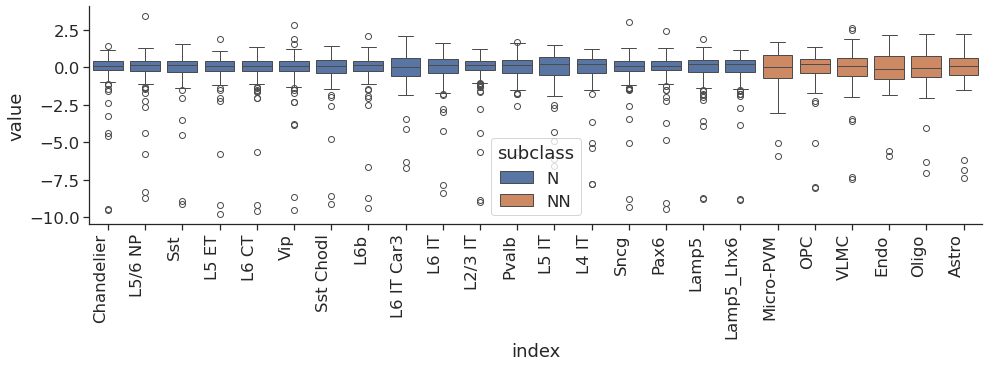

168


<ipython-input-1057-6de6603ff1c8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


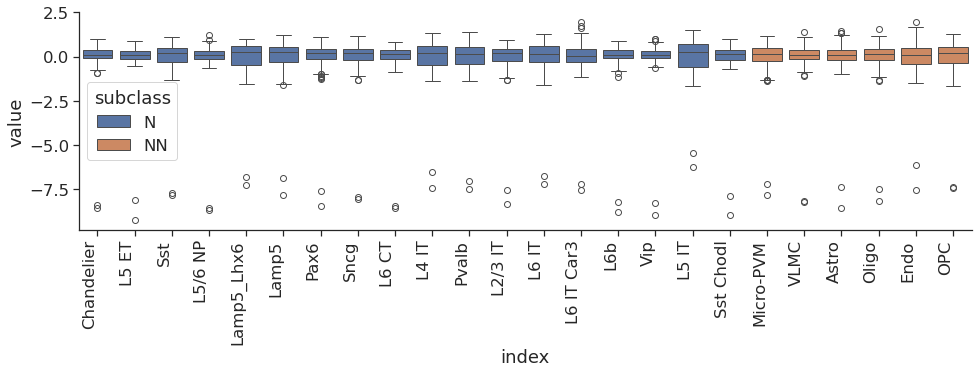

37


<ipython-input-1057-6de6603ff1c8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


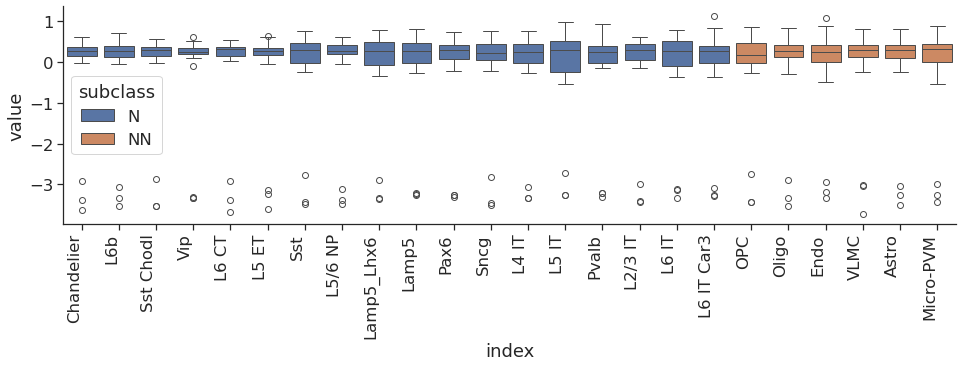

80


<ipython-input-1057-6de6603ff1c8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


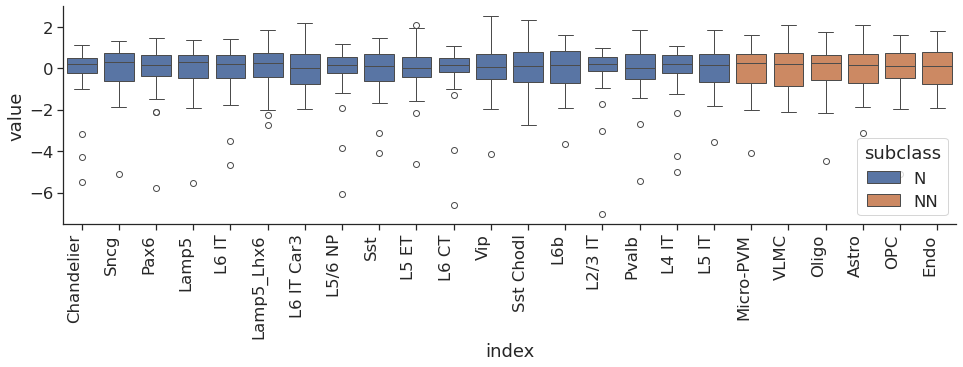

In [1057]:
feature_list = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]

        bins_eqtl = df_all_eqtl['bin_id'].tolist()
        
        #dk = adata.to_df(layer='gw_inter_0_z_scores_500_False_False_mean')
        dk = adata.to_df(layer='mean')
        #dk = dk.dropna(axis=1)
        my_val=2

        bins_eqtl = list(set(bins_eqtl))
        print (len(bins_eqtl))
        
        

        features = dk[bins_eqtl]
        
       

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]

        
        features = features[~features.index.isin(['Immature_other', 'Immature_Cardiomyocytes', 'Pericytes_Stromal', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Endothelial_Arterial', 'Endothelial_Venous', 'Endothelial_Capillaries'])]


        #features = features[features['subclass'] != 'heart']
        
        

        features = features.drop(columns=['subclass'])
        #print (features)

        z_scores = stats.zscore(features, axis=1, nan_policy='omit')

        
        #features = features[features>2]

        features=features.fillna(0)

        #fr = bottleneck.nanrankdata(features, axis=0)
        
        #fr = stats.rankdata(features, axis=0, method='ordinal')

        #fr = fr/bottleneck.nanmax(fr, axis=0)

        features = pd.DataFrame(data=z_scores,
                          index=features.index,
                          columns=features.columns)
      
        
        features = pd.melt(features.reset_index(), id_vars='index', var_name='feature', value_name='value')
        
       






        features['subclass'] = [class2_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])
                           
        features['disease'] = dis_name
        features['no_of_snps'] = len(bins_eqtl)
        
        
        feature_list.append(features)
        
        plt.figure(figsize=(16, 4))
        #ax=sns.boxplot(data=features, x=features.index, hue='subclass')
        ax=sns.boxplot(data=features, y='value',x='index', hue='subclass')
        plt.xticks(rotation=90, ha='right')
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Adjust rotation angle as needed
        
        plt.show()


        


        

In [843]:
feature_list[0].groupby(['disease', 'index'])['value'].mean().reset_index()

disease                     index     value
0      SCZ                Adipocytes -0.000547
1      SCZ                     Astro -0.026970
2      SCZ            Cardiomyocytes -0.032888
3      SCZ                Chandelier  0.021155
4      SCZ                      Endo  0.036043
5      SCZ               Endocardial  0.002610
6      SCZ      Endothelial_Arterial -0.044354
7      SCZ   Endothelial_Capillaries  0.016816
8      SCZ        Endothelial_Venous  0.037115
9      SCZ        Epicardium_FB-like -0.053781
10     SCZ           Epicardium_Meso  0.019003
11     SCZ  Epicardium_Proliferating  0.008812
12     SCZ               Fibroblasts -0.023972
13     SCZ                   L2/3 IT -0.024782
14     SCZ                     L4 IT  0.000549
15     SCZ                     L5 ET -0.095432
16     SCZ                     L5 IT  0.002694
17     SCZ                   L5/6 NP  0.048925
18     SCZ                     L6 CT  0.052214
19     SCZ                     L6 IT -0.013492
20     SCZ                L6 IT Car3  0.024307
21     SCZ                       L6b  0.008795
22     SCZ                     Lamp5 -0.041587
23     SCZ                Lamp5_Lhx6  0.005888
24     SCZ     Lymphoid_Immune_Cells -0.152351
25     SCZ                 Micro-PVM  0.025425
26     SCZ      Myeloid_Immune_Cells  0.007547
27     SCZ            Neuronal_Cells -0.028024
28     SCZ                       OPC  0.012983
29     SCZ                     Oligo  0.045636
30     SCZ                      Pax6  0.029154
31     SCZ                 Pericytes  0.063653
32     SCZ         Pericytes_Stromal -0.046564
33     SCZ                     Pvalb -0.015234
34     SCZ       Smooth_Muscle_Cells  0.026384
35     SCZ                      Sncg  0.002844
36     SCZ                       Sst  0.035891
37     SCZ                 Sst Chodl  0.021840
38     SCZ                      VLMC  0.084320
39     SCZ                       Vip -0.040628

In [942]:
df2_list = []
for features in feature_list:
    df2_list.append(features.groupby(['index', 'subclass', 'disease'])['value'].median().reset_index())

In [943]:
df2 = pd.concat(df2_list)

In [ ]:
sns.clustermap(pd.pivot_table(data=df2, index='index', columns='disease', values='value'), z_score=0,  cmap='RdBu',yticklabels=True)


<ipython-input-1043-aa5720961c7a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


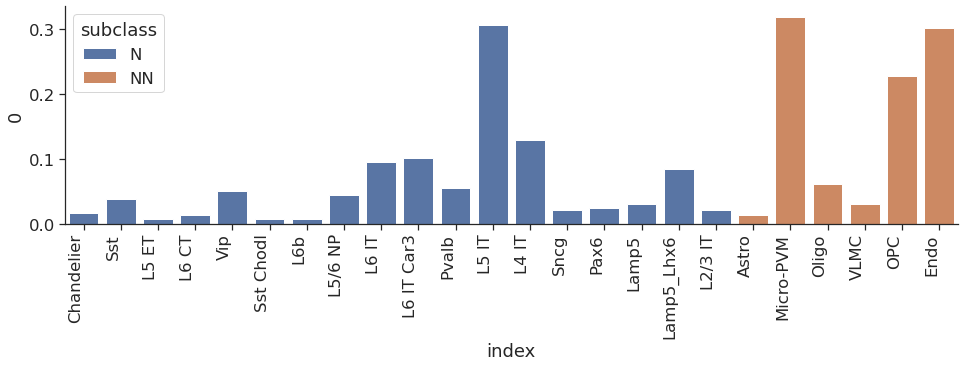

<ipython-input-1043-aa5720961c7a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


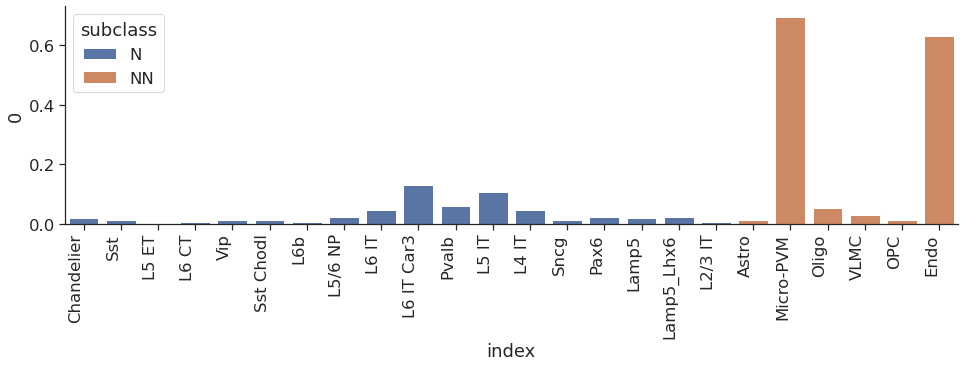

<ipython-input-1043-aa5720961c7a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


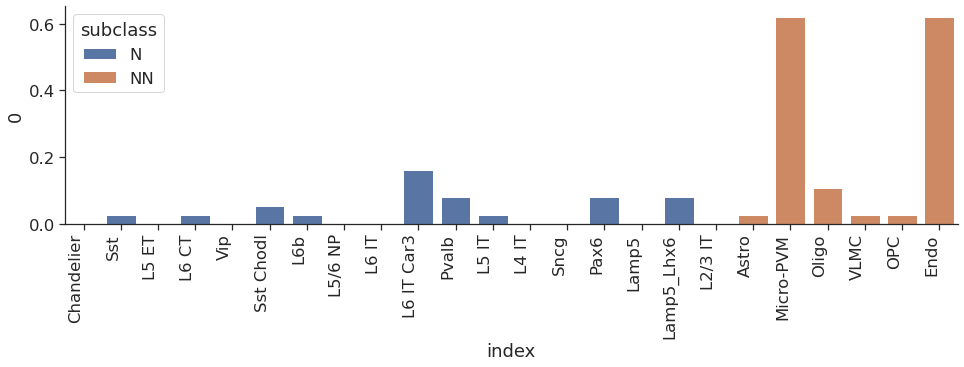

<ipython-input-1043-aa5720961c7a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['subclass'] = [class2_dict[x] for x in features.index.tolist()]


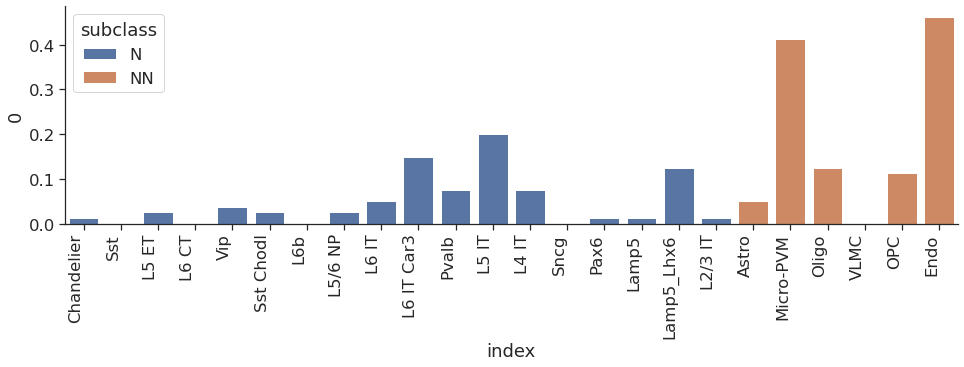

In [1043]:
feature_list = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]

        bins_eqtl = df_all_eqtl['bin_id'].tolist()
        
        #dk = adata.to_df(layer='gw_inter_0_z_scores_500_False_False_mean')
        dk = adata.to_df(layer='mean')
        #dk = dk.dropna(axis=1)
        my_val=0.95

        bins_eqtl = list(set(bins_eqtl))
        
        

        features = dk[bins_eqtl]
        
       

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]
        
        features = features[~features.index.isin(['Endothelial_Other', 'Immature_other', 'Immature_Cardiomyocytes'])]

        #features = features[features['subclass'] != 'heart']
        
        

        features = features.drop(columns=['subclass'])

        z_scores = stats.zscore(features, axis=0, nan_policy='omit')

        
        #features = features[features>2]

        features=features.fillna(0)

        #fr = bottleneck.nanrankdata(features, axis=0)
        
        fr = stats.rankdata(features, axis=0, method='ordinal')

        fr = fr/bottleneck.nanmax(fr, axis=0)

        features = pd.DataFrame(data=fr,
                          index=features.index,
                          columns=features.columns)



        features = features.dropna(axis=1, how='all')

        features = features[features>my_val]

        features=features.fillna(0)

        features = features[features<=my_val]

        features=features.fillna(1)

        features = features.sum(axis=1)/features.count(axis=1)


        features= features.reset_index()

        features['subclass'] = [class2_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])
                           
        features['disease'] = dis_name
        
        feature_list.append(features)
        
        plt.figure(figsize=(16, 4))
        ax=sns.barplot(data=features, y=features[0], x=features['index'], hue='subclass')
        plt.xticks(rotation=90, ha='right')

        #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust rotation angle as needed
        
        plt.show()


        


        

In [ ]:
feature_list = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]

        bins_eqtl = df_all_eqtl['bin_id'].tolist()
        
        #dk = adata.to_df(layer='gw_inter_0_z_scores_500_False_False_mean')
        dk = adata.to_df(layer='mean')
        #dk = dk.dropna(axis=1)
        my_val=0.95

        bins_eqtl = list(set(bins_eqtl))
        
        

        features = dk[bins_eqtl]
        
       

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]
        
        features = features[~features.index.isin(['Endothelial_Other', 'Immature_other', 'Immature_Cardiomyocytes'])]

        #features = features[features['subclass'] != 'heart']
        
        

        features = features.drop(columns=['subclass'])

        z_scores = stats.zscore(features, axis=0, nan_policy='omit')

        
        #features = features[features>2]

        features=features.fillna(0)

        #fr = bottleneck.nanrankdata(features, axis=0)
        
        fr = stats.rankdata(features, axis=0, method='ordinal')

        fr = fr/bottleneck.nanmax(fr, axis=0)

        features = pd.DataFrame(data=fr,
                          index=features.index,
                          columns=features.columns)



        features = features.dropna(axis=1, how='all')

        features = features[features>my_val]

        features=features.fillna(0)

        features = features[features<=my_val]

        features=features.fillna(1)

        features = features.sum(axis=1)/features.count(axis=1)


        features= features.reset_index()

        features['subclass'] = [class2_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])
                           
        features['disease'] = dis_name
        
        feature_list.append(features)
        
        plt.figure(figsize=(16, 4))
        ax=sns.barplot(data=features, y=features[0], x=features['index'], hue='subclass')
        plt.xticks(rotation=90, ha='right')

        #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust rotation angle as needed
        
        plt.show()


        


        

In [1044]:
df2 = pd.concat(feature_list)

In [1053]:
df2_list = []
for features in feature_list:
    df2_list.append(features.groupby(['index', 'subclass', 'disease'])['value'].median().reset_index())

In [1054]:
df2 = pd.concat(df2_list)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

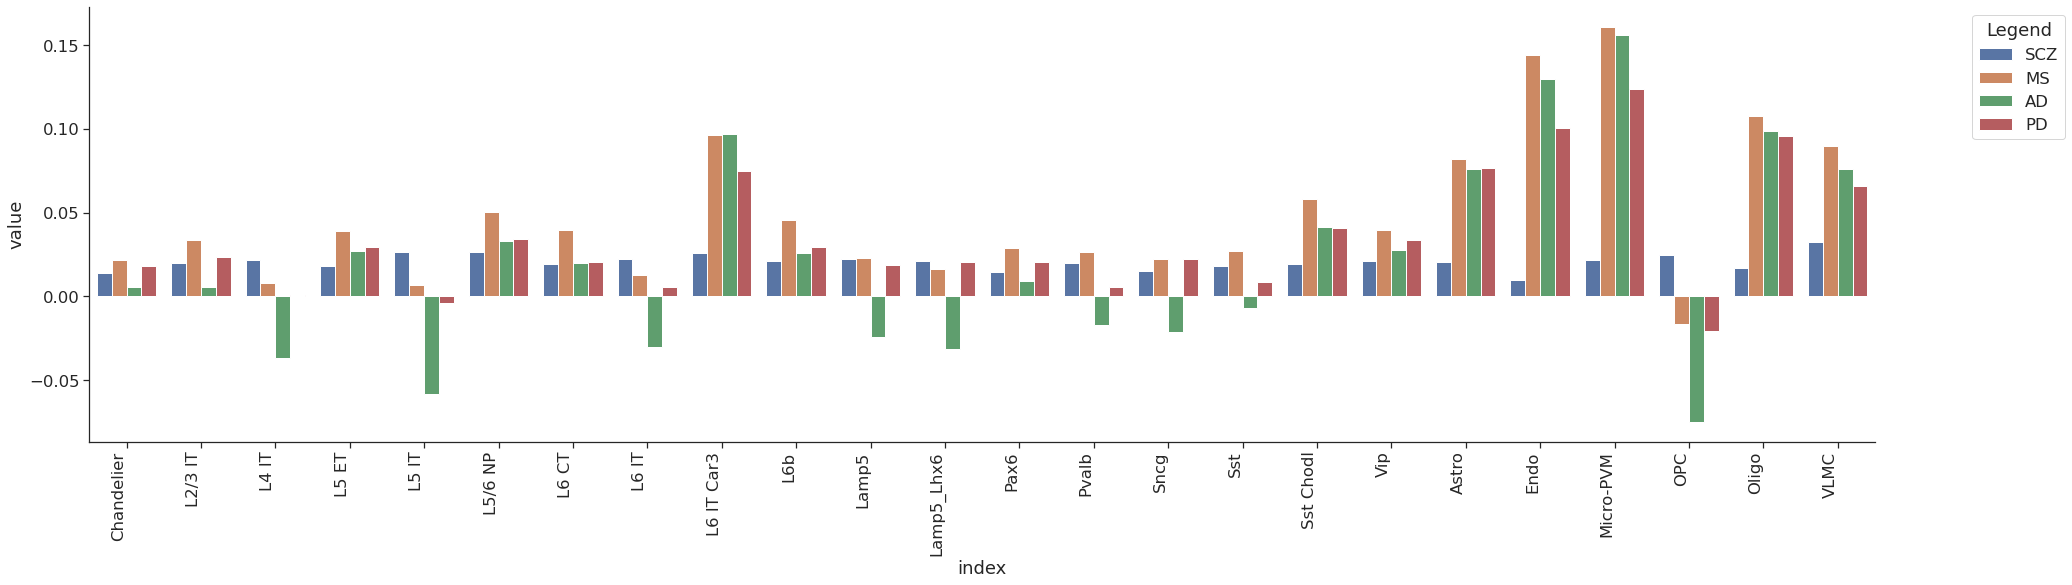

In [1056]:
plt.figure(figsize=(32, 8))
df2 = df2.sort_values(by=['subclass', 'index'])
#sns.scatterplot(data=df2.reset_index() , x='index', y='value', hue='disease')
sns.barplot(data=df2.reset_index() , x='index', y='value', hue='disease', errorbar=('ci', 95))
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')

In [1046]:
df2

index         0 subclass disease
0   Chandelier  0.016949        N     SCZ
0   Chandelier  0.017857        N      MS
0   Chandelier  0.000000        N      AD
0   Chandelier  0.012500        N      PD
9      L2/3 IT  0.020339        N     SCZ
..         ...       ...      ...     ...
15       Oligo  0.125000       NN      PD
16        VLMC  0.030508       NN     SCZ
16        VLMC  0.029762       NN      MS
16        VLMC  0.027027       NN      AD
16        VLMC  0.000000       NN      PD

[96 rows x 4 columns]

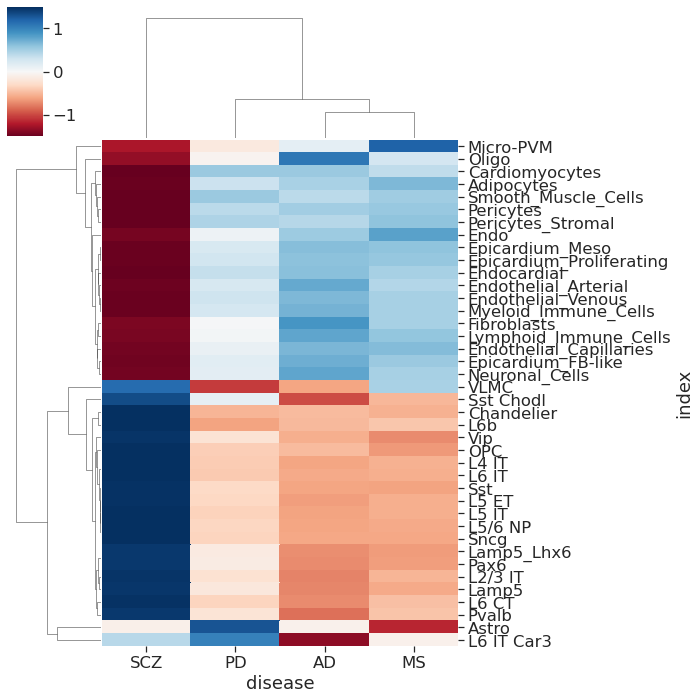

In [1002]:
sns.clustermap(pd.pivot_table(data=df2, index='index', columns='disease', values='value'),cmap='RdBu',z_score=0,yticklabels=True)


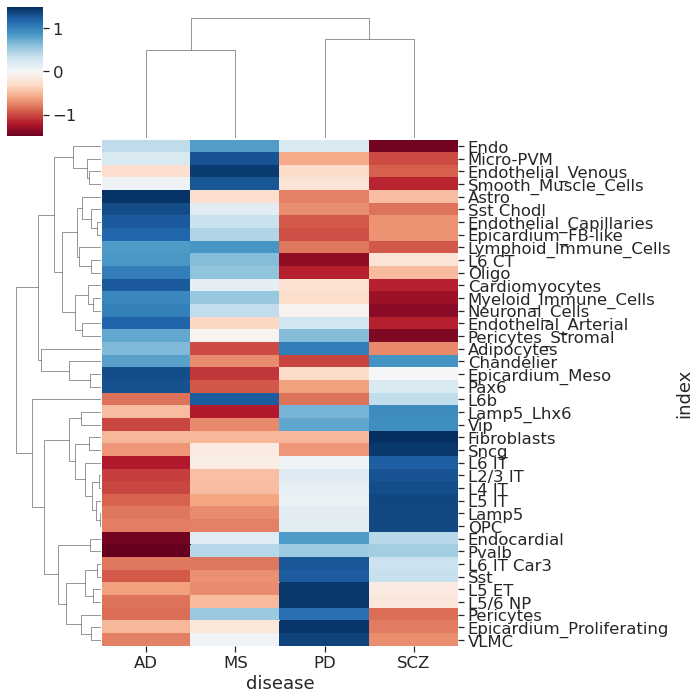

In [661]:
sns.clustermap(pd.pivot_table(data=df2, index='index', columns='disease', values=0), z_score=0,  cmap='RdBu',yticklabels=True)



In [80]:
#heart overlap atac heatmap calc

In [269]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt
from pyranges import read_gtf


from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


#egad function

import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck




def calculate_pearson_correlation(df, df_b, corr_method):
    # Perform bin intersection
    bins_intersect = set(df.columns.tolist()).intersection(set(df_b.columns.tolist()))
    df = df.loc[:, bins_intersect]
    #df = df.fillna(0)
    #df_b = df_b.fillna(0)
    df_b = df_b.loc[:, bins_intersect]


    # Z-score normalization
    df_b_z = stats.zscore(df_b, axis=0, nan_policy='omit')
    df_b_z = pd.DataFrame(df_b_z, index=df_b.index.tolist(), columns=df_b.columns)
    df_b_z['cell_type'] = df_b_z.index.tolist()
    df_b_z = df_b_z.set_index(['cell_type'])

    df_z = stats.zscore(df, axis=0, nan_policy='omit')
    df_z = pd.DataFrame(df_z, index=df.index.tolist(), columns=df.columns)
    df_z['cell_type'] = df_z.index.tolist()
    df_z['cell_type'] = [x + '_hic' for x in df_z['cell_type']]
    df_z = df_z.set_index(['cell_type'])
    

    # Concatenate dataframes
    #print (df_b_z)
    #print (df_z)
    df_corr = pd.concat([df_b_z, df_z], axis=0)

    
    
    #df_corr = df_corr.dropna(axis=1, how='all')
    #df_corr = df_corr.dropna(axis=1)
    
    #df_corr = df_corr.set_index(['cell_type'])

            
    #features_sc = stats.zscore(df_corr, axis=0, nan_policy='omit')
    
    #features_sc = features_sc.dropna(how='all', axis=1).fillna(0)
    
    #features_sc = features_sc.dropna(how='all', axis=1)
    
                
    df_dist_df = df_corr.T.corr(min_periods=10, method=corr_method)



    return df_dist_df


def calculate_auc_nan(df_dist_df, tp):
    df_jac_subset = df_dist_df.values
    df_exp_subset = tp.values

    coodinates_1 = np.where(np.isnan(df_jac_subset))
    coodinates_2 = np.where(np.isnan(df_exp_subset))

    x_coo = coodinates_1[0].tolist() + coodinates_2[0].tolist()
    y_coo = coodinates_1[1].tolist() + coodinates_2[1].tolist()

    df_jac_subset[x_coo, y_coo] = np.nan
    df_exp_subset[x_coo, y_coo] = np.nan

    predicts2 = bottleneck.nanrankdata(df_jac_subset, axis=1)

    tp = df_exp_subset.copy()
    tn = 1 - tp

    pos_rank_sum = tp * predicts2
    auc_array = (((np.nansum(pos_rank_sum, axis=1) / (np.nansum(tp, axis=1))) - (np.nansum(tp, axis=1) + 1) / 2)) / np.nansum(tn, axis=1)

    df_auc = pd.DataFrame({'cell_type': df_dist_df.index.tolist(), 'AUC': auc_array})

    return df_auc

cell_type_map = {
 'Adipocyte' : 'Adipocytes',
 'Atrial Cardiomyocyte': 'Cardiomyocytes',
 'Ventricular Cardiomyocyte':'Immature_Cardiomyocytes',
 'Endothelial': 'Endothelial_Other' ,
 'Fibroblast': 'Fibroblasts',
 'Smooth Muscle': 'Smooth_Muscle_Cells',
 'Lymphocyte': 'Lymphoid_Immune_Cells',
 'Macrophage': 'Myeloid_Immune_Cells',
 'Nervous': 'Neuronal_Cells',}
        

#for each marker-list and input file , I can make one output file

def calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name):
    

        adata = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
        adata_b = ad.read_h5ad(f'{input_file_another_exp_h5ad}', backed='r')
        df_b = adata_b.to_df()
        df = adata.to_df()
        
        if marker_name == 'brain_heart':
            df_b.index = [cell_type_map[x] for x in df_b.index.tolist()]

        

        cell_type_intersect = df.index.intersection(df_b.index)


        #df_b = df_b.loc[cell_type_intersect,:]
        

        np_of_col = len(cell_type_intersect)*2
        np_of_rows = len(cell_type_intersect)*2
        
        adata_l = ad.AnnData(np.zeros((np_of_rows, np_of_col)))

        
        layer_names = adata.layers.keys()    
        for corr_method in ['pearson']:
                        for given_layer in layer_names:
                        #for given_layer in accepted_layer_list:
                        
                        


                                df = adata.to_df(layer=given_layer)

                                df = df.loc[cell_type_intersect,:]

                                df_corr_real_names = calculate_pearson_correlation(df, df_b, corr_method)

                                l_n = f'{given_layer}_{corr_method}'

                                adata_l.layers[l_n] = df_corr_real_names

                                # Perform cell type intersection
                                #cell_type_intersect = df.index.intersection(df_b.index)

                                hic_cell_type = [x + '_hic' for x in cell_type_intersect]

                                df_corr = df_corr_real_names.loc[cell_type_intersect,:]
                            
                                df_corr = df_corr[hic_cell_type]

                                #df_corr  = df_corr.fillna(0)

                                #df_corr += abs(df_corr.min().min())

                                given_dict = dict(zip(df_corr.index.tolist(), df_corr.index.tolist()))

                                n = len(given_dict.keys())

                                tp_class = np.zeros((n, n))

                                # Fill the diagonal elements with 1
                                np.fill_diagonal(tp_class, 1)

                                df_tp_class = pd.DataFrame(tp_class, index=given_dict.keys(), columns=given_dict.values())

                                for key, value in given_dict.items():
                                    df_tp_class.loc[key, value] = 1
                            
                                df_tp_class = df_tp_class.loc[df_corr.index.tolist(), :]
                                    
                                    
                                df_exp = calculate_auc_nan(df_corr, df_tp_class)

                                adata_l.uns[l_n] = df_exp



        adata_l.obs_names = df_corr_real_names.index.tolist()
        adata_l.var_names = df_corr_real_names.columns.tolist()

        adata_l.write(outputfile_h5ad, compression="gzip")


In [270]:

no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
no_of_markers_list = [200]
for no_of_markers in no_of_markers_list:




    for species in ['human']:
        for process_type in ['intra']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False]:
                        for marker_name in ['brain_heart']:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 

                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #input_file_another_exp_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/zemke_brain.h5ad'
                                #outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'


                                #calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)

                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'                            
                                input_file_another_exp_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/zemke_heart.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'
                                
                                if os.path.isfile(outputfile_h5ad):
                                    os.remove(outputfile_h5ad)
                                    calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)
                                else:
                                    calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)





In [271]:

no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
no_of_markers_list = [200]
for no_of_markers in no_of_markers_list:




    for species in ['human']:
        for process_type in ['inter']:
            for resolution in ['10kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False]:
                        for marker_name in ['brain_heart']:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 

                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #input_file_another_exp_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/zemke_brain.h5ad'
                                #outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'


                                #calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)

                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'                            
                                input_file_another_exp_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/zemke_heart.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_atac.h5ad'
                                
                                if os.path.isfile(outputfile_h5ad):
                                    os.remove(outputfile_h5ad)
                                    calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)
                                else:
                                    calc_pair_corr(input_file_h5ad, input_file_another_exp_h5ad, outputfile_h5ad, marker_name)



